In [1]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from fuzzywuzzy import fuzz,process
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import re
import os
pd.set_option('display.max_rows', None)

In [11]:
#read dataframe
df = pd.read_csv('C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/coba_check.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/coba_check.csv'

In [3]:
df.shape

(611, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sbu              611 non-null    object
 1   kode_item        611 non-null    object
 2   nama_item        611 non-null    object
 3   nama_item_clean  611 non-null    object
 4   ref_id_salah     611 non-null    object
 5   REF.nama_item    611 non-null    object
 6   nama_item.1      611 non-null    object
 7   gg               611 non-null    object
 8   new_ref          611 non-null    object
 9   check            611 non-null    object
dtypes: object(10)
memory usage: 47.9+ KB


In [29]:
#extract size in baut in new column
# df['size2'] = df['nama_item_clean'].str.extract(r'^(.*?)\s([^ ]+)$')[0]
# df['size2'] = df['nama_item_clean'].str.extract(r'^(.*?)\s(\d+X\d+X\d+\s\w+)$')[1]
# df['size2'] = df['nama_item_clean'].str.extract(r'(M+\d+X\d+)$')
# pattern =  r'(M\d+X\d+)$'
# pattern =  r'(\d+X\d+)'
# pattern =r'(\d+X\d+X\d+)'
pattern = r'(\d+X\d\.\d+X\d+)' 
# Mencari dan mengekstrak pola dengan regex
df['size'] = df['nama_item_clean'].str.extract(pattern)
# pattern = r'(.*?)\s(\d+X\d+X\d+\s\w+)$|(M\d+X\d+\s\w+)$'


In [79]:
df['S1_new'] = df['S1_new'].fillna(df['S1'])
# df['S1_new'] = df['S1_new'].fillna('BAUT')
# df['size2'] = df['size'].copy()



In [61]:
df['size2'].unique()

array(['16X170', '16X180', nan, '14X100', '14X190', '16X65', '16X75',
       '20X45', '20X55', '20X65', '20X170', '4X15', '5X30', '8X90',
       '12X40', '5X15', '14X50', '8X20', '24X85', '8X25', '6X100',
       '30X400', '8X70', '12X35', '6X20', '30X150', '12X45', '10X40',
       '5X45', '5X35', '6X35', '4X30', '5X20', '8X15', '22X120', '22X90',
       '24X200', '8X40', '10X80', '12X120', '5X10', '32X130', '16X60',
       '16X200', '24X60', '18X80', '4X25', '20X200', '12X75', '27X150',
       '12X55', '14X45', '10X45', '5X80', '24X80', '14X150', '10X35',
       '24X100', '22X80', '14X220', '16X120', '12X50', '6X45', '12X30',
       '18X70', '10X90'], dtype=object)

In [71]:
def row_match(row):
    if isinstance(row['nama_item_clean'],str):
        ratio = fuzz.token_set_ratio(row['nama_item_clean'].lower(),'PIR'.lower())
        return 'BAUT + MUR + RING PIR' if ratio >= 80 else np.nan
    else:
        return np.nan

# Apply the function to create the 'S1_new' column
df['S1_new'] = df.apply(row_match, axis=1)

In [114]:
# Function to perform fuzzy matching
def fuzzy_match(row):
    if isinstance(row['S1'], str):
        ratio = fuzz.ratio(row['S1'].lower(), 'PATTERN'.lower())
        return 'PATTERN' if ratio >= 80 else np.nan
    else:
        return np.nan

# Apply the function to create the 'S1_new' column
df['S1_new1'] = df.apply(fuzzy_match, axis=1)

In [126]:
# df['s3_new_add_d_2'] = np.where(df['S3'].str.contains('D', case=False), 'D', np.nan)
# df['S4'].unique().shape

In [7]:
# Check if 'S3' does not contain 'D' and set 's3_new_add_d_2' accordingly
df['ref_id_true'] = np.where(df['check'].str.contains('y', case=False),df['new_ref'],np.nan)
# df['S5_new'] = np.where(df['size2'].str.contains('"', case=False), 'D', 'M')

In [77]:
df['S1'] = df['S1'].str.replace('BAUT/NUT','BAUT + MUR')
# df['size2'] = df['size2'].str.replace(r'X\d+X|X\d\.\d+X', 'X')

In [8]:
# df[df['size2'].isna() == True ]
# df[df['size2'].str.contains('')==True]
df.head()

sbu           kode_item                           nama_item  \
0  IPG  SPT.P2.CM.00000098                BAUT L M 18 X 130 MM   
1  IPG  SPT.P2.NS.00004512                 BAUT L M18 X 130 MM   
2  ISP             UM12028  BAUT L             ,D20X65MM  BAJA   
3  ISP                UM77     BAUT L BAJA        ,D 16X20X100   
4  IPG  GAS.GA.LL.00003028                 BAUT L M 8X30 + MUR   

           nama_item_clean ref_id_salah            REF.nama_item  \
0     BAUT L M 18 X 130 MM      IT-1813     BAUT L M 18 X 130 MM   
1      BAUT L M18 X 130 MM      IT-2101      BAUT L M18 X 130 MM   
2     BAUT L D20X65MM BAJA      IT-1814     BAUT L D20X65MM BAJA   
3  BAUT L BAJA D 16X20X100      IT-1817  BAUT L BAJA D 16X20X100   
4      BAUT L M 8X30 + MUR      IT-3504      BAUT L M 8X30 + MUR   

               nama_item.1                      gg  new_ref check ref_id_true  
0     BAUT L M 18 X 130 MM       BAUT L M18X130 MM  IT-1813     y     IT-1813  
1      BAUT L M18 X 130 MM       BAUT L M18X130 MM  IT-1813     n         NaN  
2     BAUT L D20X65MM BAJA   BAUT L M20X65 MM BAJA  IT-1814     y     IT-1814  
3  BAUT L BAJA D 16X20X100  BAUT L M16X100 MM BAJA  IT-1817     y     IT-1817  
4      BAUT L M 8X30 + MUR   BAUT + MUR L M8X30 MM  IT-1818     n         NaN

## POLA BAUT

In [5]:
# Pola regex
# pattern = r'^\d+\.?\d*X\d+\.?\d*X\d+$' #8X125X20
# pattern =r'(\d+X\d+X\d+)' #'8X125X20'
# pattern = r'(\d+X\d\.\d+X\d+)' #22X2.5X100'
pattern = r'(\s\d+X\d+\s)$'
pattern = r'(\s\d+X\d+\s\\d+)'
# \d+X\d+/\d+
# Contoh string
example = '20X70/80'

# Mencocokkan pola regex dengan contoh string
match = re.search(pattern, example)

if match:
    print("Cocok:", match.group(0))
else:
    print("Tidak cocok")

Tidak cocok


In [58]:
input_string = "16X2.8X170"

# Use regular expression to remove "X\d+X" pattern
result = re.sub(r'X\d+X|X\d\.\d+X', 'X', input_string)

print(result)

16X170


In [9]:
df.to_excel('C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/haduh2.xlsx',index=False)

In [156]:
# Input string
text = '18X2.5X170'

# Define the regex pattern to match
pattern =r'X\d\.\d+X' # Pattern to match '18X2.5X170'

# Define the replacement string
replacement = r'XX'  # Pattern to replace it with '18X170'

# Use re.sub to replace the pattern
result = re.sub(pattern, replacement, text)

# Print the result
print(result)
#(\d+X\d\.\d+X\d+)

18XX170


In [157]:
df['new_size2'] = df['size'].str.replace(pattern,'XX')

C:\Users\Corporate\AppData\Local\Temp\ipykernel_11284\1983708505.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_size2'] = df['size'].str.replace(pattern,'XX')


In [145]:
df['new_size'] = df['size'].str.replace(r'XX','X')

In [152]:
df['new_size'] = df['size'].str.replace(r'X\d+X','XX')

C:\Users\Corporate\AppData\Local\Temp\ipykernel_11284\980175060.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_size'] = df['size'].str.replace(r'X\d+X','XX')


In [171]:
# import re

# # Input string
# text = '10X55'

# # Pola regex untuk mencocokkan "M\d+X\d+\sMM"
# pattern = r'\d+X\d+'

# # Mencocokkan pola regex dalam string
# match = re.search(pattern, text)

# if match:
#     # Mengambil hasil kecocokan
#     matched_text = match.group(0)
    
#     # Menggabungkan hasil kecocokan dengan teks tambahan
#     new_text = matched_text + ' ' 
    
#     # Mengganti string asli dengan string yang telah dimodifikasi
#     result = re.sub(pattern, new_text, text)
    
#     # Menampilkan hasil
#     print(result)
# else:
#     print("Pola tidak ditemukan dalam string.")
import re

# Input string
text = '8X125X20 and 12X3X240'

# Define the regex pattern to match "\d+X\d+"
pattern = r'\d+X\d+'  # Pattern to match '8X125' and '3X240'

# Define the replacement pattern
replacement = r'M\d+X\d+\sMM'  # Pattern to replace it with 'M8X125 MM' and 'M3X240 MM'

# Use re.sub to replace the pattern
result = re.sub(pattern, replacement, text)

# Print the result
print(result)



error: bad escape \d at position 1

In [90]:
df['size'] = df['size'].fillna(df['size4'])

In [158]:
df

sbu             nama_item_clean  ref_iD         S1           S2  \
0    ISP                 B/N M 3X 10  IT-3479       B/N            M   
1    ISP                 B/N M 4X 35  IT-2992       B/N            M   
2    ISP                 B/N M 6X 10  IT-3014       B/N            M   
3    ISP                 B/N M 6X 20  IT-2254       B/N            M   
4    ISP                 B/N M 6X 30  IT-1992       B/N            M   
5    ISP                 B/N M 6X 35  IT-3082       B/N            M   
6    ISP                 B/N M 6X 75  IT-3281       B/N            M   
7    ISP                 B/N M 8X 20  IT-2839       B/N            M   
8    ISP                 B/N M 8X 25  IT-3257       B/N            M   
9    ISP                 B/N M 8X 30  IT-1915       B/N            M   
10   ISP              B/N M 8X 35/40  IT-1918       B/N            M   
11   ISP                 B/N M 8X 50  IT-1924       B/N            M   
12   ISP              B/N M10X 15/20  IT-3061       B/N         M10X   
13   ISP                 B/N M10X 25  IT-3495       B/N         M10X   
14   ISP                 B/N M10X 30  IT-2830       B/N         M10X   
15   ISP                 B/N M10X 35  IT-3109       B/N         M10X   
16   ISP                 B/N M10X 45  IT-3121       B/N         M10X   
17   ISP                 B/N M10X 50  IT-2360       B/N         M10X   
18   ISP              B/N M10X 50/60  IT-2877       B/N         M10X   
19   ISP                 B/N M10X 65  IT-3198       B/N         M10X   
20   ISP                 B/N M10X 70  IT-2709       B/N         M10X   
21   ISP                 B/N M10X 75  IT-3419       B/N         M10X   
22   ISP             B/N M10X1.25X30  IT-2718       B/N  M10X1.25X30   
23   ISP                B/N M12X 100  IT-2194       B/N         M12X   
24   ISP                 B/N M12X 20  IT-2628       B/N         M12X   
25   ISP                 B/N M12X 25  IT-3367       B/N         M12X   
26   ISP                 B/N M12X 30  IT-2860       B/N         M12X   
27   ISP                 B/N M12X 35  IT-2312       B/N         M12X   
28   ISP                 B/N M12X 40  IT-2775       B/N         M12X   
29   ISP                 B/N M12X 45  IT-2987       B/N         M12X   
30   ISP                 B/N M12X 50  IT-1972       B/N         M12X   
31   ISP                 B/N M12X 60  IT-3100       B/N         M12X   
32   ISP                 B/N M12X 70  IT-2069       B/N         M12X   
33   ISP                 B/N M14X 25  IT-2340       B/N         M14X   
34   ISP                 B/N M14X 30  IT-3138       B/N         M14X   
35   ISP                 B/N M14X 40  IT-2771       B/N         M14X   
36   ISP                 B/N M14X 50  IT-3456       B/N         M14X   
37   ISP                 B/N M14X 60  IT-3195       B/N         M14X   
38   ISP                 B/N M14X 80  IT-2759       B/N         M14X   
39   ISP                 B/N M14X120  IT-1844       B/N      M14X120   
40   ISP                B/N M16X 130  IT-2070       B/N         M16X   
41   ISP                 B/N M16X 30  IT-2655       B/N         M16X   
42   ISP                 B/N M16X 35  IT-2632       B/N         M16X   
43   ISP                 B/N M16X 40  IT-2762       B/N         M16X   
44   ISP              B/N M16X 45/50  IT-2919       B/N         M16X   
45   ISP                 B/N M16X 55  IT-3058       B/N         M16X   
46   ISP                 B/N M16X 60  IT-1858       B/N         M16X   
47   ISP                 B/N M16X 70  IT-3146       B/N         M16X   
48   ISP                 B/N M16X100  IT-2794       B/N      M16X100   
49   ISP                 B/N M16X120  IT-3244       B/N      M16X120   
50   ISP                 B/N M18X 50  IT-3288       B/N         M18X   
51   ISP                 B/N M18X 60  IT-2406       B/N         M18X   
52   ISP                B/N M20X 130  IT-3178       B/N         M20X   
53   ISP                 B/N M20X 40  IT-2186       B/N         M20X   
54   ISP                 B/N M20X 50  IT-2169

In [108]:
df['nama_item_new'] = df['nama_item_new'].str.replace('M','M ')

In [ ]:
df['agg_cluster_label_item_clean'].value_counts()

In [192]:
df['item_clean'] = df['item_clean'].str.replace('BAUT/MUR BAJA','BAUT/MUR BAJA,')

In [213]:
df['item_clean'] = df['item_clean'].str.replace('BAUT/MUR BIASA','BAUT/MUR BIASA,')

In [230]:
df['item_clean'] = df['item_clean'].str.replace('BAUT L. BAJA','BAUT L. BAJA,')

C:\Users\Corporate\AppData\Local\Temp\ipykernel_1972\2925256133.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['item_clean'] = df['item_clean'].str.replace('BAUT L. BAJA','BAUT L. BAJA,')


In [239]:
df['item_clean'] = df['item_clean'].str.replace('BAUT L BAJA','BAUT L. BAJA,')

In [233]:
df['item_clean'] = df['item_clean'].str.replace('BAUT M','BAUT M,')

In [254]:
df['item_clean'] = df['item_clean'].replace('BAUT+MUR, MUR M10X70','BAUT+MUR, M10X70')

In [322]:
df['item_clean'] = df['item_clean'].replace('MUR/BAUT BIASA D8X125X40','MUR/BAUT BIASA, D8X125X40')

In [456]:
df['item_clean'] = df['item_clean'].str.replace('BAUT L TANEM BAJA','BAUT L TANEM BAJA,')

In [509]:
df['item_clean'] = df['item_clean'].str.replace('BAUT L TANEM','BAUT L TANEM,')

In [9]:
df['REF.nama_item'] = df['REF.nama_item'].str.replace('CLAMPP','CLAMP')

In [27]:
# Define replacement lists (including the new one)
s = ['ACHOR', 'ANCHOR', 'ANGKER']
t = ['DINABOL', 'DINABOLT']
u = ['LOCNUT', 'LOCKNUT', 'LOCK NUT', 'LOCK MUR']
r = ['STENLIS', 'STAINLESS STEEL']
o = ['STUT', 'STOOD']
y = ['VERSHING', 'VERSING']
g = ['MATERMUR', 'WATERMUR', 'WATER MUR']


# Perform the replacements (including the new one)
for i in s:
    res = i.replace(s,'ANGKUR')
# df['REF.nama_item'] = df['REF.nama_item'].replace(s, 'ANGKUR')
# df['REF.nama_item'] = df['REF.nama_item'].replace(t, 'DYNABOLT')
# df['REF.nama_item'] = df['REF.nama_item'].replace(u, 'LOCK NUT')
# df['REF.nama_item'] = df['REF.nama_item'].replace(r, 'STAINLESS')
# df['REF.nama_item'] = df['REF.nama_item'].replace(o, 'STUD')
# df['REF.nama_item'] = df['REF.nama_item'].replace(y, 'VERSENG')
# df['REF.nama_item'] = df['REF.nama_item'].replace(g, 'WATER MUR')

TypeError: replace() argument 1 must be str, not list

In [31]:
# Define replacement lists
s = ['ACHOR', 'ANCHOR', 'ANGKER']
t = ['DINABOL', 'DINABOLT']
u = ['LOCNUT', 'LOCKNUT', 'LOCK NUT', 'LOCK MUR']
r = ['STENLIS', 'STAINLESS STEEL']
o = ['STUT', 'STOOD']
y = ['VERSHING', 'VERSING']
g = ['MATERMUR', 'WATERMUR', 'WATER MUR']

# Create a dictionary to map old values to new values
replacement_mapping = {
    'ACHOR': 'ANGKUR',
    'ANCHOR': 'ANGKUR',
    'ANGKER': 'ANGKUR',
    'DINABOL': 'DYNABOLT',
    'DINABOLT': 'DYNABOLT',
    'LOCNUT': 'LOCK NUT',
    'LOCKNUT': 'LOCK NUT',
    'LOCK NUT': 'LOCK NUT',
    'LOCK MUR': 'LOCK NUT',
    'STENLIS': 'STAINLESS',
    'STAINLESS STEEL': 'STAINLESS',
    'STUT': 'STUD',
    'STOOD': 'STUD',
    'VERSHING': 'VERSENG',
    'VERSING': 'VERSENG',
    'MATERMUR': 'WATER MUR',
    'WATERMUR': 'WATER MUR',
    'WATER MUR': 'WATER MUR'
}

# Loop through the replacement lists and apply the replacements
for replacement_list in [s, t, u, r, o, y, g]:
    for old_value in replacement_list:
        df['REF.nama_item'] = df['REF.nama_item'].replace(old_value, replacement_mapping.get(old_value, old_value))


In [18]:
# df['REF.nama_item'] = df['REF.nama_item'].str.replace('ANGKER','ANGKUR')

In [105]:
df['REF.nama_item']= df['REF.nama_item'].str.replace('FLAT HEAD', 'JF')

In [109]:
df[df['REF.nama_item'].str.contains('JF')]

kode_item                               nama_item  \
334   SPT.P1.BB.00000236                  BAUT FLAT HEAD M3X15MM   
335   SPT.P1.BB.00000237                  BAUT FLAT HEAD M3X20MM   
336   SPT.P1.BB.00000238                  BAUT FLAT HEAD M4X15MM   
337   SPT.P1.BB.00000239                 BAUT FLAT  HEAD M4X20MM   
338   SPT.P1.BB.00000246                   Baut Flat Head M3X5MM   
658   SPT.P1.BB.00000240                   BAUT FLAT HEAD 4X3OMM   
746   SPT.P1.BB.00000241          DRILLING SCREW FLAT HEAD M4X15   
747   SPT.P1.BB.00000242          DRILLING SCREW FLAT HEAD M4X20   
748   SPT.P1.BB.00000243        DRILLING SCREW FLAT HEAD M4X30MM   
1250  SPT.P1.BB.00000189                 SCREW FLAT HEAD M4X25MM   
1253  SPT.P1.BB.00000179                BAUT FLAT HEAD M2.5X10MM   
1359  SPT.P5.EN.00000141                        BAUT JF + MUR M6   
1363  SPT.P1.BB.00000137  BAUT FLAT HEAD M3X10 (STAINLESS STEEL)   
1364  SPT.P1.BB.00000138   BAUT FLAT HEAD M3X6 (STAINLESS STEEL)   
1455  GAS.GA.LL.00003070                   BAUT JF L BAJA M10X15   
1567  SPT.P2.NS.00004494                     BAUT JFL.12 X 40 MM   

                           part_number jenis_item     kategori_item  status  \
334             BAUT FLAT HEAD M3X15MM      Stock         SPAREPART  Active   
335             BAUT FLAT HEAD M3X20MM      Stock         SPAREPART  Active   
336             BAUT FLAT HEAD M4X15MM      Stock         SPAREPART  Active   
337            BAUT FLAT  HEAD M4X20MM      Stock         SPAREPART  Active   
338              Baut Flat Head M3X5MM      Stock         SPAREPART  Active   
658              BAUT FLAT HEAD 4X3OMM      Stock         SPAREPART  Active   
746     DRILLING SCREW FLAT HEAD M4X15      Stock         SPAREPART  Active   
747     DRILLING SCREW FLAT HEAD M4X20      Stock         SPAREPART  Active   
748   DRILLING SCREW FLAT HEAD M4X30MM      Stock         SPAREPART  Active   
1250           SCREW FLAT HEAD M4X25MM      Stock         SPAREPART  Active   
1253          BAUT FLAT HEAD M2.5X10MM      Stock         SPAREPART  Active   
1359                  BAUT JF + MUR M6      Stock         SPAREPART  Active   
1363              BAUT FLAT HEAD M3X10      Stock         SPAREPART  Active   
1364               BAUT FLAT HEAD M3X6      Stock         SPAREPART  Active   
1455             BAUT JF L BAJA M10X15      Stock  GENERAL SUPPLIES  Active   
1567               BAUT JFL.12 X 40 MM      Stock         SPAREPART  Active   

              updated_at  sbu                 item_id sub_cluster  ...  \
334  2023-03-08 08:08:15  IPG  IPG-SPT.P1.BB.00000236        BAUT  ...   
335  2023-03-08 08:37:47  IPG  IPG-SPT.P1.BB.00000237        BAUT  ...   
336  2023-03-08 08:43:15  IPG  IPG-SPT.P1.BB.00000238        BAUT  ...   
337  2023-03-08 08:46:14  IPG  IPG-SPT.P1.BB.00000239        BAUT  ...   
338  2023-04-05 05:49:55  IPG  IPG-SPT.P1.BB.00000246        BAUT  ...   
658  2023-03-08 08:46:36  IPG  IPG-SPT.P1.BB.00000240        BAUT  ...   
746  2023-03-08 08:49:49  IPG  IPG-SPT.P1.BB.00000241        BAUT  ...   
747  2023-03-08 08:51:24  IPG  IPG-SPT.P1.BB.00000242        BAUT  ...   
748  2023-03-08 08:52:35  IPG  IPG-SPT.P1.BB.00000243        BAUT  ...   
1250 2020-10-21 05:57:00  IPG  IPG-SPT.P1.BB.00000189        BAUT  ...   
1253 2020-03-09 00:57:52  IPG  IPG-SPT.P1.BB.00000179        BAUT  ...   
1359 2022-07-08 02:20:00  IPG  IPG-SPT.P5.EN.00000141        BAUT  ...   
1363 2019-02-07 05:32:01  IPG  IPG-SPT.P1.BB.00000137        BAUT  ...   
1364 2019-02-07 05:35:09  IPG  IPG-SPT.P1.BB.00000138        BAUT  ...   
1455 2020-02-10 03:24:43  IPG  IPG-GAS.GA.LL.00003070        BAUT  ...   
1567 2023-05-09 06:32:08  IPG  IPG-SPT.P2.NS.00004494        BAUT  ...   

       ref_id              REF.nama_item REF.part_number  REF.coarse_spec  \
334   IT-2526            BAUT JF M3X15MM             NaN          M3X15MM   
335   IT-2848            BAUT JF M3X20MM             NaN          M3X20MM   
336   IT-2261           

In [113]:
# counts =df['agg_cluster_label_item_clean'] == 27

In [983]:
# Updating the 'item_clean' column based on the condition
# df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace('BAUT/MUR BAJA', 'BAUT/MUR BAJA,')
# df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace(r',(?=MUR)', ', ', regex=True)
# df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace(r'(BAUT \+ MUR )','BAUT + MUR,')

df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace('BAUT FLATE HEAD', 'BAUT FLAT HEAD,').str.strip()

# df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace(r'BAUT L', r'BAUT L,')


# Print the updated 'item_clean' values for rows where the condition is True
print(df.loc[counts, 'item_clean'])

2632     BAUT FLAT HEAD, M3X5MM
2633    BAUT FLAT HEAD, M4X15MM
2634    BAUT FLAT HEAD, M3X15MM
Name: item_clean, dtype: object


In [62]:
counts =df['agg_cluster_label_item_clean'] == 275
for idx, w in df.iterrows():
    if counts[idx]:  # Checking if the value at the corresponding index is True
        print(w['item_clean'])

WATER MUR GALVANIS 2" SNI
WATER MUR 2" GALVANIS SNI
WATER MUR GALVANIS 2"


In [ ]:
# df['item_clean'] = df['item_clean'].str.replace('SCB-14FT/WA.0022A/ .0024 CENTERINGBAUT/LOGMUR','CENTERINGBAUT/LOGMUR SCB-14FT/WA.0022A/ .0024')

In [916]:
# Assuming 'agg_cluster_label_item_clean' is a column in the DataFrame 'df'
# cluster_below = [str(cluster) for cluster in df['agg_cluster_label_item_clean'].tolist() if len(str(cluster)) < 4]

# print('Cluster labels with length less than 4 characters:')
# for cluster in cluster_below:
#     print(cluster, df['item_clean'])

In [ ]:
# # Memperbarui nilai kolom 'kluster' pada df_loc dengan nilai kluster dari df_cluster1
# df.loc[df['agg_cluster_label_item_clean'] == 66, 'item_clean'] = df.loc[df['agg_cluster_label_item_clean'] == 66, 'item_clean']

In [69]:
# df['item_clean'].str.replace('BAUT/MUR BAJA','BAUT/MUR BAJA,')

In [108]:
df.to_excel('baut_120923_v6_FLATHEADJADIJF.xlsx',index=False)

In [5]:
data2 = {
    'column1': ['Hello', 'How', 'Are', 'You'],
    'column2': [' World', ' are', ' you?', ''],
}

# Create the DataFrame
df3 = pd.DataFrame(data2)



In [58]:
df3

column1 column2
0   Hello   World
1     How     are
2     Are    you?
3     You

In [60]:
# Using the + operator to concatenate 'column1' and 'column2'
df3['concatenated_column'] = df3['column1'] + df3['column2']

# Using the str.cat() method to concatenate 'column1' and 'column2'
df3['concatenated_column_2'] = df3['column1'].str.cat(df3['column2'], sep="")

# Displaying the DataFrame
print(df3)

  column1 column2 concatenated_column concatenated_column_2
0   Hello   World         Hello World           Hello World
1     How     are             How are               How are
2     Are    you?            Are you?              Are you?
3     You                         You                   You


In [7]:
baut = pd.read_excel('4copy_bautmur.xlsx')

In [9]:
baut.head()

sbu           kode_item              nama_item jenis_item kategori_item  \
0  IPG  SPT.P6.MT.00000070     DYNABOLT M12 X 100      Stock     SPAREPART   
1  IPG  SPT.P2.NS.00004204      DYNABOLT M10 X 40      Stock     SPAREPART   
2  IRP        610501000071     DYNABOLT M16 X 100      Stock     SPAREPART   
3  IRP        610503000018  BAUT BAJA M20 X 55 MM      Stock     SPAREPART   
4  IRP        610503000027   BAUT BAJA M8 X 25 MM      Stock     SPAREPART   

               item_clean  cluster_label  agg_cluster_label_item_clean  
0     DYNABAUT M,12 X 100             -1                             0  
1      DYNABAUT M,10 X 40             -1                             0  
2     DYNABAUT M,16 X 100             -1                             0  
3  BAUT BAJA, M20 X 55 MM             -1                             1  
4   BAUT BAJA ,M8 X 25 MM             -1                             1

In [12]:
counts =baut['agg_cluster_label_item_clean'] == 9
for idx, w in baut.iterrows():
    if counts[idx]:  # Checking if the value at the corresponding index is True
        print(w['item_clean'])

BAUT L,M 10 X 70
BAUT L,M 10 X 120
BAUT L,M 10 X 80
BAUT L,M 10 X 130
BAUT L,M 10 X 40
BAUT L,M 10 X 40
BAUT L,M 10 X 50
BAUT L,M 10 X 50
BAUT L,M 10 X 90
BAUT L,M 10 X 90


In [22]:
# Updating the 'item_clean' column based on the condition
# df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace('BAUT/MUR BAJA', 'BAUT/MUR BAJA,')
# df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace(r',(?=MUR)', ', ', regex=True)
# df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace(r'(BAUT \+ MUR )','BAUT + MUR,')

baut.loc[counts, 'item_clean'] = baut.loc[counts, 'item_clean'].str.replace('BAUT LM,', 'BAUT L,M').str.strip()

# df.loc[counts, 'item_clean'] = df.loc[counts, 'item_clean'].str.replace(r'BAUT L', r'BAUT L,')


# Print the updated 'item_clean' values for rows where the condition is True
print(baut.loc[counts, 'item_clean'])

34     BAUT L,M 10 X 70
35    BAUT L,M 10 X 120
36     BAUT L,M 10 X 80
37    BAUT L,M 10 X 130
38     BAUT L,M 10 X 40
39     BAUT L,M 10 X 40
40     BAUT L,M 10 X 50
41     BAUT L,M 10 X 50
42     BAUT L,M 10 X 90
43     BAUT L,M 10 X 90
Name: item_clean, dtype: object


In [43]:
#pola untuk mencari penulisan needle yang salah dengan tingkat kemiripan 80
def find_and_replace_flat(string):
    needle = "FLAT"
    similarity_threshold = 70

    words = string.split()  # Membagi string menjadi kata-kata

    for i, word in enumerate(words):
        if fuzz.token_set_ratio(word, needle) > similarity_threshold:
            words[i] = needle

    return ' '.join(words)  # Menggabungkan kata-kata menjadi string kembali
df['item_clean'] = df['item_clean'].apply(find_and_replace_flat)

In [65]:
df['nama_item2'] = df['nama_item2'].str.replace('PLAT','FLAT')

In [66]:
df['nama_item2'] = df['nama_item2'].str.replace('FLATE','FLAT')

In [68]:
# df

In [57]:
df['agg_cluster2_label_nama_item2'].value_counts()

183    416
356    286
159    160
351    149
255     98
220     94
287     65
11      45
169     42
229     32
208     27
9       25
119     24
359     20
131     20
304     19
335     18
189     18
149     17
157     16
343     16
223     15
129     15
63      12
295     10
128     10
60       9
382      9
271      9
205      9
1        8
372      8
283      8
406      8
176      8
315      7
64       7
28       7
7        7
221      7
360      7
350      7
31       7
215      6
203      6
56       6
55       6
65       6
312      6
310      6
32       6
324      6
16       6
26       5
108      5
272      5
84       5
81       5
34       5
78       5
333      5
172      5
199      5
50       5
62       5
52       5
153      5
256      5
368      4
148      4
379      4
193      4
94       4
140      4
125      4
123      4
122      4
188      4
97       4
158      4
184      4
332      4
177      4
371      4
174      4
115      4
202      4
163      4
361      4
112      4
166      4

In [55]:
# df.to_excel('baut4.xlsx',index=False)

In [27]:
# search_value = 'FLATE'

# # Initialize a variable to count occurrences of the search_value
# count_occurrences = 0

# # Iterate over the rows and search for the value in the 'nama_item' column
# for index, row in baut.iterrows():
#     print(row)
#     if search_value in baut['item_clean']:
#         count_occurrences += 1
#         # token = fuzz.partial_ratio(search_value, row['nama_item']) >= 80
#         print(f"Value Found at {index} || sbu:{row['sbu']} || value:{row['item_clean']}")
#         # print(token)
# # Print the count of occurrences
# print(f"Total Occurrences of '{search_value}': {count_occurrences}")

In [54]:
# Search for a value in the 'column_name' column using str.contains
search_value = 'FLAT'
result = df[df['item_clean'].str.contains(search_value, case=False)]

result

sbu           kode_item                                      nama_item  \
411   ISP             UM03142          NUT LOADING PLATE  ,NSP 44455.04-0790   
661   IPG  SPT.P1.BB.00000105           BAUT M16X45MM+MUR+RING PIR+RING PLAT   
751   IPG  SPT.P1.BB.00000104        BAUT M16X35MM +MUR+RING PIR + RING PLAT   
754   IPG  SPT.P1.BB.00000104        BAUT M16X35MM +MUR+RING PIR + RING PLAT   
763   IPG  SPT.P1.BB.00000105           BAUT M16X45MM+MUR+RING PIR+RING PLAT   
897   IPG  SPT.P1.BB.00000243              DRILLING SCREW FLATE HEAD M4X30MM   
898   IPG  SPT.P1.BB.00000242                 DRILLING SCREW FLAT HEAD M4X20   
899   IPG  SPT.P1.BB.00000241                 DRILLING SCREW FLAT HEAD M4X15   
1772  IPG  SPT.BL.MD.00000269  BAUT FD +MUR+RING PLAT+ RING PER 1/2 - 13 UNC   
1773  IPG  SPT.BL.MD.00000269  BAUT FD +MUR+RING PLAT+ RING PER 1/2 - 13 UNC   
1827  IPG  SPT.P1.BB.00000062        BAUT  M 4X25 (MUR, RING PIR, RING PLAT)   
1834  IPG  SPT.P1.BB.00000062        BAUT  M 4X25 (MUR, RING PIR, RING PLAT)   
1859  IPG  SPT.P1.BB.00000063         BAUT M 6X60 (MUR, RING PIR, RING PLAT)   
1891  IPG  SPT.P1.BB.00000063         BAUT M 6X60 (MUR, RING PIR, RING PLAT)   
1907  IPG  SPT.P1.BB.00000239                       BAUT FLATE  HEAD M4X20MM   
1908  IPG  SPT.P1.BB.00000189                       SCREW FLATE HEAD M4X25MM   
1909  IPG  SPT.P1.BB.00000138         BAUT FLATE HEAD M3X6 (STAINLESS STEEL)   
1910  IPG  SPT.P1.BB.00000240                         BAUT FLATE HEAD 4X3OMM   
1911  IPG  SPT.P1.BB.00000236                         BAUT FLAT HEAD M3X15MM   
1912  IPG  SPT.P1.BB.00000238                        BAUT FLATE HEAD M4X15MM   
1913  IPG  SPT.P1.BB.00000246                          BAUT FLAT HEAD M3X5MM   
1914  IPG  SPT.P1.BB.00000137        BAUT FLATE HEAD M3X10 (STAINLESS STEEL)   
1915  IPG  SPT.P1.BB.00000179                      BAUT FLATE HEAD M2.5X10MM   
1916  IPG  SPT.P1.BB.00000237                        BAUT FLATE HEAD M3X20MM   
1982  ISP             UM06080         LOWER CLIP+L.HOOK+ ,WING NUT+LUG PLATO   
2641  IPG  SPT.P2.NS.00002103            BAUT HITAM + MUR + RING PLAT M 5/8"   
2642  IPG  SPT.P2.NS.00002103            BAUT HITAM + MUR + RING PLAT M 5/8"   

     jenis_item kategori_item                                     item_clean  \
411       Stock     Sparepart            MUR LOADING FLAT .NSP 44455.04-0790   
661       Stock     SPAREPART          BAUT M,16X45MM+MUR+RING PIR+RING FLAT   
751       Stock     SPAREPART       BAUT M,16X35MM +MUR+RING PIR + RING FLAT   
754       Stock     SPAREPART       BAUT M,16X35MM +MUR+RING PIR + RING FLAT   
763       Stock     SPAREPART          BAUT M,16X45MM+MUR+RING PIR+RING FLAT   
897       Stock     SPAREPART                DRILLING BAUT FLAT HEAD M4X30MM   
898       Stock     SPAREPART                  DRILLING BAUT FLAT HEAD M4X20   
899       Stock     SPAREPART                  DRILLING BAUT FLAT HEAD M4X15   
1772      Stock     SPAREPART  BAUT FD +MUR+RING FLAT RING ,PER 1/2 - 13 UNC   
1773      Stock     SPAREPART  BAUT FD +MUR+RING FLAT RING ,PER 1/2 - 13 UNC   
1827      Stock     SPAREPART         BAUT, M 4X25 (MUR. RING PIR. RING FLAT   
1834      Stock     SPAREPART         BAUT, M 4X25 (MUR. RING PIR. RING FLAT   
1859      Stock     SPAREPART         BAUT, M 6X60 (MUR. RING PIR. RING FLAT   
1891      Stock     SPAREPART         BAUT, M 6X60 (MUR. RING PIR. RING FLAT   
1907      Stock     SPAREPART                        BAUT FLAT HEAD ,M4X20MM   
1908      Stock     SPAREPART                        BAUT FLAT HEAD ,M4X25MM   
1909      Stock     SPAREPART          BAUT FLAT HEAD M3X6 (STAINLESS STEEL)   
1910      Stock     SPAREPART                          BAUT FLAT HEAD 4X3OMM   
1911      Stock     SPAREPART                        BAUT FLAT HEAD, M3X15MM   
1912      Stock     SPAREPART                        BAUT FLAT HEAD, M4X15MM   
1913      Stock     SPAREPART                         BAUT FLAT HEAD, M3X5MM   
1914 

In [29]:
# baut.to_excel('copybaut5.xlsx',index=False)

In [2]:
baut2 = pd.read_excel('baut2.xlsx')

In [3]:
baut2.head()

sbu           kode_item           nama_item jenis_item kategori_item  \
0  IPG  SPT.P1.BB.00000190   BAUT HEX M8X100MM      Stock     SPAREPART   
1  ISP             SP09056  EYE BOLT, M12 X 75      Stock     Sparepart   
2  IPG  SPT.P5.PD.00000370     CNC SCREW CS-3D      Stock     SPAREPART   
3  ISP             SP09127  BOLT STB, BED0183B      Stock     Sparepart   
4  IPG  SPT.P1.BL.00000985     SCREW SDS 10X25      Stock     SPAREPART   

           item_clean  cluster_label  agg_cluster_label_item_clean nama_item2  \
0   BAUT HEX M8X100MM             -1                           913  BAUT HEX    
1  EYE BAUT ,M12 X 75             -1                           789  EYE BAUT    
2     CNC BAUT, CS-3D             -1                          1129   CNC BAUT   
3  BAUT STB, BED0183B             -1                          1124   BAUT STB   
4     BAUT SDS ,10X25             -1                          1021  BAUT SDS    

      ukuran  agg_cluster_label_nama_item2  
0   M8X100MM                             0  
1   M12 X 75                             0  
2      CS-3D                             0  
3   BED0183B                             0  
4      10X25                             0

In [38]:
# baut2= baut2.rename(columns={"Unnamed: 10": "ukuran2"})

# BAUT MUR

In [99]:
raw = pd.read_excel('baut_120923_v6_MOVEBAJAANDSTAINLESS.xlsx')
raw.head()

kode_item                                    nama_item part_number  \
0  610503000116  U-Bolt CLAMPp + Mur Galvanis Uk. 1 1/4 Inch         NaN   
1  610503000117      U-Bolt CLAMPp + Mur Galvanis Uk. 2 Inch         NaN   
2  610503000143     U-Bolt CLAMPp + Mur Galvanis Uk. 10 Inch         NaN   
3  610503000144     U-Bolt CLAMPp + Mur Galvanis Uk. 12 Inch         NaN   
4  610503000145     U-Bolt CLAMPp + Mur Galvanis Uk. 14 Inch         NaN   

  jenis_item kategori_item  status          updated_at  sbu           item_id  \
0      Stock     SPAREPART  Active 2022-05-09 10:59:18  IRP  IRP-610503000116   
1      Stock     SPAREPART  Active 2022-05-09 10:59:18  IRP  IRP-610503000117   
2      Stock     SPAREPART  Active 2023-04-13 09:21:24  IRP  IRP-610503000143   
3      Stock     SPAREPART  Active 2023-04-13 09:21:24  IRP  IRP-610503000144   
4      Stock     SPAREPART  Active 2023-04-13 09:21:24  IRP  IRP-610503000145   

  sub_cluster  ...   ref_id                        REF.nama_item  \
0        BAUT  ...  IT-2349  U-BOLT CLAMPP + MUR GALVANIS 1 1/4"   
1        BAUT  ...  IT-2951      U-BOLT CLAMPP + MUR GALVANIS 2"   
2        BAUT  ...  IT-2253     U-BOLT CLAMPP + MUR GALVANIS 10"   
3        BAUT  ...  IT-2511     U-BOLT CLAMPP + MUR GALVANIS 12"   
4        BAUT  ...  IT-3051     U-BOLT CLAMPP + MUR GALVANIS 14"   

  REF.part_number  REF.coarse_spec REF.jenis_item REF.kategori_item  \
0             NaN            1 1 4          Stock         SPAREPART   
1             NaN                2          Stock         SPAREPART   
2             NaN               10          Stock         SPAREPART   
3             NaN               12          Stock         SPAREPART   
4             NaN               14          Stock         SPAREPART   

  REF.status _score agg_cluster_label_REF.nama_item dbscan_cluster_label  
0     Active    100                               0                   -1  
1     Active    100                               0                   -1  
2     Active    100                               0                   -1  
3     Active    100                               0                   -1  
4     Active    100                               0                   -1  

[5 rows x 25 columns]

In [42]:
#remove combination about BAUT MUR,  MUR BAUT, BAUT/MUR, MUR/BAUT, BAUT+MUR, MUR+BAUT
# ban_ = ['BAUT MUR',  'MUR BAUT', 'BAUT/MUR', 'B/N']

# for ban_combo in ban_:
#     for j, w in raw.iterrows():
#         w['REF.nama_item'] = re.sub(re.escape(ban_combo), 'MUR BAUT', str(w['REF.nama_item']), flags=re.IGNORECASE)

ban_ = ['BAUT MUR', 'MUR BAUT', 'BAUT/MUR', 'MUR/BAUT', 'BAUT+MUR', 'MUR+BAUT', 'B/N']

# raw['REF.nama_item'] = raw['REF.nama_item'].apply(lambda x: 'BAUT MUR' if any(ban in x for ban in ban_) else x)

for banned in ban_:
    raw['REF.nama_item'] = raw['REF.nama_item'].str.replace(banned, 'BAUT MUR')

C:\Users\Corporate\AppData\Local\Temp\ipykernel_17440\811759432.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  raw['REF.nama_item'] = raw['REF.nama_item'].str.replace(banned, 'BAUT MUR')


In [98]:
raw.to_excel('baut_120923_v6_MOVEBAJAANDSTAINLESS.xlsx',index=False)

In [97]:
raw[raw['nama_item'].str.contains('STAINLESS')]

kode_item                               nama_item  \
776   SPT.P5.MT.00000177                       MUR STAINLESS M12   
882   SPT.P5.MT.00000176                 BAUT STUD STAINLESS M12   
1207  SPT.P5.MT.00000714          MUR + RING STAINLESS âŒ€ 12 MM   
1261  SPT.P2.NS.00000422       BAUT STAINLESS 5/8 X 3 INCH + MUR   
1420  SPT.P1.BB.00000075                BAUT L8x65mm (STAINLESS)   
1503  SPT.P1.BB.00000137  BAUT FLAT HEAD M3X10 (STAINLESS STEEL)   
1504  SPT.P1.BB.00000138   BAUT FLAT HEAD M3X6 (STAINLESS STEEL)   
1540  SPT.P2.CM.00000104          BAUT PAYUNG STAINLESS L M10X40   
1626  SPT.P5.MT.00000548                       MUR STAINLESS M16   
1668  SPT.BL.LB.00000050      BAUT STAINLESS L M10 X 30 MM + MUR   
1676  SPT.BL.LB.00000046                    BAUT STAINLESS STEEL   
1691  SPT.BL.LB.00000122            BAUT STAINLESS DISK FRICTION   

                             part_number jenis_item kategori_item  status  \
776                                  NaN      Stock     SPAREPART  Active   
882                                  NaN      Stock     SPAREPART  Active   
1207      MUR + RING STAINLESS âŒ€ 12 MM      Stock     SPAREPART  Active   
1261   BAUT STAINLESS 5/8 X 3 INCH + MUR      Stock     SPAREPART  Active   
1420                       B.BAUT.01.076      Stock     SPAREPART  Active   
1503                BAUT FLAT HEAD M3X10      Stock     SPAREPART  Active   
1504                 BAUT FLAT HEAD M3X6      Stock     SPAREPART  Active   
1540               F.BU.PY.SS.L M10X40--      Stock     SPAREPART  Active   
1626                   MUR STAINLESS M16      Stock     SPAREPART  Active   
1668  BAUT STAINLESS L M10 X 30 MM + MUR      Stock     SPAREPART  Active   
1676                BAUT STAINLESS STEEL      Stock     SPAREPART  Active   
1691        BAUT STAINLESS DISK FRICTION      Stock     SPAREPART  Active   

              updated_at  sbu                 item_id sub_cluster  ...  \
776  2020-12-04 03:47:10  IPG  IPG-SPT.P5.MT.00000177        BAUT  ...   
882  2020-12-04 03:45:30  IPG  IPG-SPT.P5.MT.00000176        BAUT  ...   
1207 2022-02-08 07:08:11  IPG  IPG-SPT.P5.MT.00000714        BAUT  ...   
1261 2018-05-31 07:41:27  IPG  IPG-SPT.P2.NS.00000422        BAUT  ...   
1420 2018-05-31 07:38:48  IPG  IPG-SPT.P1.BB.00000075        BAUT  ...   
1503 2019-02-07 05:32:01  IPG  IPG-SPT.P1.BB.00000137        BAUT  ...   
1504 2019-02-07 05:35:09  IPG  IPG-SPT.P1.BB.00000138        BAUT  ...   
1540 2018-05-31 07:40:20  IPG  IPG-SPT.P2.CM.00000104        BAUT  ...   
1626 2021-07-16 01:44:57  IPG  IPG-SPT.P5.MT.00000548        BAUT  ...   
1668 2018-11-23 01:36:40  IPG  IPG-SPT.BL.LB.00000050        BAUT  ...   
1676 2018-05-31 07:38:25  IPG  IPG-SPT.BL.LB.00000046        BAUT  ...   
1691 2021-11-02 06:04:52  IPG  IPG-SPT.BL.LB.00000122        BAUT  ...   

       ref_id                       REF.nama_item REF.part_number  \
776   IT-3327                   STAINLESS MUR M12             NaN   
882   IT-2640             STAINLESS STUD BAUT M12             NaN   
1207  IT-3218      STAINLESS MUR + RING âŒ€ 12 MM             NaN   
1261  IT-2288       STAINLESS BAUT 5/8 X 3" + MUR             NaN   
1420  IT-3267            (STAINLESS) BAUT L8X65MM        B 01.076   
1503  IT-2273    (STAINLESS) BAUT FLAT HEAD M3X10             NaN   
1504  IT-2364     (STAINLESS) BAUT FLAT HEAD M3X6             NaN   
1540  IT-3435      STAINLESS PAYUNG BAUT L M10X40      F.BU.PY.SS   
1626  IT-2658                   STAINLESS MUR M16             NaN   
1668  IT-2550  STAINLESS BAUT L M10 X 30 MM + MUR             NaN   
1676  IT-2112                      STAINLESS BAUT             NaN   
1691  IT-2159        STAINLESS BAUT DISK FRICTION             NaN   

      REF.coarse_spec REF.jenis_item REF.kategori_item REF.status _score  \
776               M12          Stock         SPAREPART     Active    100   
882               M12          Stock         SPAREPART     Active    100   
1207               12          Stock   

In [94]:
def move_BAJA_to_front(row):
    choices = row.split()
    needle_match = process.extractOne("BAJA", choices, scorer=fuzz.ratio)
    if needle_match and needle_match[1] > 70:
        choices.remove(needle_match[0])
        choices.insert(0, needle_match[0])
        return ' '.join(choices)
    else:
        return row
raw['REF.nama_item'] = raw['REF.nama_item'].apply(move_BAJA_to_front)

In [96]:
def move_STAINLESS_to_front(row):
    choices = row.split()
    needle_match = process.extractOne("STAINLESS", choices, scorer=fuzz.ratio)
    if needle_match and needle_match[1] > 70:
        choices.remove(needle_match[0])
        choices.insert(0, needle_match[0])
        return ' '.join(choices)
    else:
        return row
raw['REF.nama_item'] = raw['REF.nama_item'].apply(move_STAINLESS_to_front)

In [87]:
# Define a function to reorder the words
# def reorder_words(text):
#     # Define a regular expression pattern to match "BAJA" or "stainless" followed by "BAUT"
#     pattern = r'(BAJA|STAINLESS) BAUT'
    
#     # Use re.sub to replace the matched pattern with "BAJA BAUT" or "stainless BAUT"
#     result = re.sub(pattern, r'\1 BAUT', text)
    
#     return result

# # Apply the function to reorder words in the 'REF.nama_item' column
# raw['REF.nama_item'] = raw['REF.nama_item'].apply(reorder_words)

# Define a function to reorder the words
# def reorder_words(text):
#     # Define a regular expression pattern to match "BAJA" or "stainless" followed by "BAUT"
#     pattern = r'(BAJA|STAINLESS)(BAUT)'
    
#     # Use re.sub to replace the matched pattern with "\1 \2"
#     result = re.sub(pattern, r'\1 \2', text)
    
#     return result

#     # Apply the function to reorder words in the 'REF.nama_item' column
#     raw['REF.nama_item'] = raw['REF.nama_item'].apply(reorder_words)

# Define a function to reorder the words
# def reorder_words(text):
#     words = text.split()
#     if 'BAUT' in words and ('BAJA' in words or 'STAINLESS' in words):
#         baut_idx = words.index('BAUT')
#         if 'BAJA' in words:
#             baja_idx = words.index('BAJA')
#             words[baut_idx], words[baja_idx] = words[baja_idx], words[baut_idx]
#         elif 'STAINLESS' in words:
#             stainless_idx = words.index('STAINLESS')
#             words[baut_idx], words[stainless_idx] = words[stainless_idx], words[baut_idx]
#     return ' '.join(words)

# # Apply the function to reorder words in the 'REF.nama_item' column
# raw['REF.nama_item'] = raw['REF.nama_item'].apply(reorder_words)

# def reorder_words(text):
#     # Use regular expressions to match "BAJA" or "stainless" followed by anything, and move it to the front
#     pattern = r'(BAJA|STAINLESS)\s+([^+]*)\s+\+'
#     result = re.sub(pattern, r'\1 \2 +', text)
#     return result

# # Apply the function to reorder words in the 'REF.nama_item' column
# raw['REF.nama_item'] = raw['REF.nama_item'].apply(reorder_words)

## JARO WINKLER CLUSTER

In [120]:

# Contoh data
data = {
    'Text': ['apple', 'apples', 'banana', 'cherry', 'aple', 'bananas', 'bandana', 'cherr'],
}

# Buat DataFrame dari data
dfA = pd.DataFrame(data)

# Baris yang akan dibandingkan (baris pertama dalam contoh ini)
# compare_row = dfA.loc[0, 'Text']

# Buat array untuk menyimpan hasil perbandingan
similarity_array = []

similarity_score = pd.DataFrame(index=dfA['Text'], columns=dfA['Text'])
for i in dfA['Text']:
    for j in dfA['Text']:
        similarity = textdistance.jaro_winkler(i, j)
        similarity_score.loc[i, j] = similarity
        
similarity_score = similarity_score.astype(float)

# Scale the similarity matrix
scaler = StandardScaler()
scaled_matray = scaler.fit_transform(similarity_score)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=2, metric='euclidean')
dbscan.fit(scaled_matray)

# Assign cluster labels to the DataFrame
dfA['dbscan_cluster_label'] = dbscan.labels_


# Tampilkan hasilnya
dfA.sort_values(by=['dbscan_cluster_label'], ascending=True)


Text  dbscan_cluster_label
0    apple                     0
1   apples                     0
4     aple                     0
2   banana                     1
5  bananas                     1
6  bandana                     1
3   cherry                     2
7    cherr                     2

In [77]:
# Calculate Silhouette Score
# silhouette_avg = silhouette_score(dfA, dbscan.labels_)

In [63]:
df_min_v1 = df[df['jaro_wink_dbscan_cluster_label']==-1]
df_min_v1.shape

(1654, 26)

In [53]:
# # Hitung similarity matrix
# similarity_score = pd.DataFrame(index=df_min_v1['REF.nama_item'], columns=df_min_v1['REF.nama_item'])
# for i in df_min_v1['REF.nama_item']:
#     for j in df_min_v1['REF.nama_item']:
#         similarity = textdistance.jaro_winkler(i, j)
#         similarity_score.loc[i, j] = similarity
        
# similarity_score = similarity_score.astype(float)

# # Scale the similarity matrix
# scaler = StandardScaler()
# scaled_matrix = scaler.fit_transform(similarity_score)

# # Agglomerative Clustering
# agglomerative = AgglomerativeClustering(n_clusters=3)  # Misalnya, menentukan jumlah cluster menjadi 3
# df_min_v1['Cluster'] = agglomerative.fit_predict(scaled_matrix)

# # Tampilkan hasilnya
# df_min_v1.head()

In [55]:
# df_min_v1['REF.coarse_spec'].fillna(0, inplace=True)
df_min_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 1800
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   kode_item                        1654 non-null   object 
 1   nama_item                        1654 non-null   object 
 2   part_number                      927 non-null    object 
 3   jenis_item                       1654 non-null   object 
 4   kategori_item                    1654 non-null   object 
 5   status                           1654 non-null   object 
 6   updated_at                       1654 non-null   float64
 7   sbu                              1654 non-null   object 
 8   item_id                          1654 non-null   object 
 9   sub_cluster                      1654 non-null   object 
 10  nama_item_clean                  1654 non-null   object 
 11  part_number_clean                196 non-null    object 
 12  coarse_spec         

In [119]:
df_min_v1['Bobot_spec'] = df_min_v1['Bobot_spec'].fillna(df_min_v1['Bobot_nama_item'])

C:\Users\Corporate\AppData\Local\Temp\ipykernel_18912\2515307539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_v1['Bobot_spec'] = df_min_v1['Bobot_spec'].fillna(df_min_v1['Bobot_nama_item'])


In [120]:
df_min_v1

kode_item                                          nama_item  \
0     SPT.P2.NS.00000343     Gate valve carbon steel uk.1" screw connection   
1     SPT.P1.BL.00000012                              SCREW BIT NO.1 PENDEK   
2     SPT.P2.NS.00001816                                     MUR UK. 1 INCH   
3           610503000117             U-Bolt CLAMP + Mur Galvanis Uk. 2 Inch   
4     SPT.P1.BL.00000013                             SCREW BIT NO.2 PANJANG   
5                UM07154                      MUR KUNING         ,TR-2/KIRI   
6     SPT.P1.BL.00000014                              SCREW BIT NO.2 PENDEK   
7           610503000146             U-Bolt CLAMP + Mur Galvanis Uk. 3 Inch   
8     SPT.P1.BF.00000001                                            MUR M 3   
9     FXA.P1.AS.00000113                                    PIN SCREW 3 PIN   
10    SPT.P1.BB.00000059                              BAUT AKRILIK DIA 3 CM   
11    SPT.P2.NS.00004482                               TERMINAL SCREW 3 PIN   
12    SPT.P1.BF.00000008                                            MUR M 4   
13    SPT.P2.NS.00004221                                    PIN SCREW 4 PIN   
14    SPT.P5.MT.00000529                                MUR MATA GERINDA 4"   
15    SPT.P5.MT.00000804                               MUR CHUCK SPINDEL 4"   
16          610503000147             U-Bolt CLAMP + Mur Galvanis Uk. 5 Inch   
17    SPT.P1.BF.00000002                                            MUR M 5   
18    SPT.P5.MT.00000530                                MUR MATA GERINDA 6"   
19    GAS.GA.LL.00000166                                     BAUT SENG 7 CM   
20          610503000148             U-Bolt CLAMP + Mur Galvanis Uk. 8 Inch   
21    SPT.P5.PD.00000330                                   BAUT TANAM L M 8   
22    SPT.P1.BF.00000004                                            MUR M 8   
23          610503000143            U-Bolt CLAMP + Mur Galvanis Uk. 10 Inch   
24    GAS.GA.LL.00001826                                       V-BOLT Ï† 10   
25    SPT.P2.NS.00002960                                     STUD BOLT M-10   
26    SPT.BL.KL.00000122                       BAUT MUR L (LOAD CELL 10 KG)   
27    SPT.P1.BL.00000078                                     DINA BOLT S 10   
28    SPT.P1.BF.00000005                                           MUR M 10   
29          610503000144            U-Bolt CLAMP + Mur Galvanis Uk. 12 Inch   
30    SPT.P2.NS.00002761                                     STUD BOLT M-12   
31    SPT.P5.MT.00000714                     MUR + RING STAINLESS âŒ€ 12 MM   
32               UM15169                          MUR PIPA KUNINGAN  ,12 MM   
33    SPT.P1.BB.00000092                                            BAUT 12   
34          610503000145            U-Bolt CLAMP + Mur Galvanis Uk. 14 Inch   
35    FCS.GA.BB.00000004                                             MUR 14   
36               KD16191                         BAUT MUR           ,14 (K)   
37    SPT.P1.BB.00000093                                            BAUT 14   
38    SPT.P1.BF.00000009                                      MUR BAJA M 14   
39    SPT.P2.NS.00003453                             BAUT M 16 + MUR + RING   
40    SPT.P2.NS.00002581                                     STUD BOLT M-16   
41    SPT.BL.MD.00000314                 BAUT M 16 + MUR + RING - FULL DRAT   
42               SP09075  QUENCHING OF HEAD PART IN HEXAGONAL BOLTS STB,...   
43    GAS.GA.LL.00002142                                           MUR M 16   
44    SPT.P2.NS.00002580                                     STUD BOLT M-18   
45    SPT.P5.MT.00000110                      BAUT UDRILL Ã˜ 19 DIV KYOCERA   
46    SPT.BL.LB.00000064                                        MUR RING 19   
47    GAS.GA.LL.00001991                                        MUR M.20 MM   
48    SPT.P1.DG.00000020                         MUR STROKE PRES B/C 20 TON   
49    GAS.GA.LL.00002081                                         

In [110]:
df_min_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 1800
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   kode_item                        1654 non-null   object 
 1   nama_item                        1654 non-null   object 
 2   part_number                      927 non-null    object 
 3   jenis_item                       1654 non-null   object 
 4   kategori_item                    1654 non-null   object 
 5   status                           1654 non-null   object 
 6   updated_at                       1654 non-null   float64
 7   sbu                              1654 non-null   object 
 8   item_id                          1654 non-null   object 
 9   sub_cluster                      1654 non-null   object 
 10  nama_item_clean                  1654 non-null   object 
 11  part_number_clean                196 non-null    object 
 12  coarse_spec         

In [1]:
# from sklearn.metrics.pairwise import cosine_similarity

# #isi kolom nan pada spec dengan nilai 0
# # df_min_v1['Bobot spec']=df_min_v1['Bobot spec'].fillna(0)

# # Berikan bobot 70% untuk kolom nama_item dan 30% untuk kolom Spec
# # df_min_v1['Bobot_spec'] = (df_min_v1['REF.coarse_spec'].str.len() * 0.3) / 100
# # df_min_v1['Bobot_nama_item'] = (df_min_v1['REF.nama_item'].str.len() * 0.7) / 100

# # Gabungkan bobot Alamat dan Nama untuk clustering
# # df_min_v1['Bobot Total'] = df_min_v1['Bobot spec'] + df_min_v1['Bobot nama_item']

# # spec_vector = np.array(df_min_v1['Bobot_spec']).reshape(1, -1)
# # nama_item_vector = np.array(df_min_v1['Bobot_nama_item']).reshape(1, -1)

# # cosine_sim = cosine_similarity(spec_vector, nama_item_vector)

# # df_min_v1['Bobot Total']=df_min_v1['Bobot Total'].fillna(df_min_v1['Bobot nama_item'])
# agglomerative = AgglomerativeClustering()
# df_min_v1['Cluster'] = agglomerative.fit_predict(cosine_sim)



In [79]:
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(df_min_v1[['Bobot Total']])

agglomerative = AgglomerativeClustering()
df_min_v1['Cluster'] = agglomerative.fit_predict(scaled_matrix)

df_min_v1.sort_values(by=['Cluster'],ascending=True)

C:\Users\Corporate\AppData\Local\Temp\ipykernel_18912\2593315682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_v1['Bobot spec'] = (df_min_v1['REF.coarse_spec'].str.len() * 0.3) / 100
C:\Users\Corporate\AppData\Local\Temp\ipykernel_18912\2593315682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_v1['Bobot nama_item'] = (df_min_v1['REF.nama_item'].str.len() * 0.7) / 100
C:\Users\Corporate\AppData\Local\Temp\ipykernel_18912\2593315682.py:6: SettingWithCopyWarning: 
A value is trying to 

kode_item                                          nama_item  \
0     SPT.P2.NS.00000343     Gate valve carbon steel uk.1" screw connection   
830   SPT.P1.CP.00000555                   DB25 Male to 25P Connector Screw   
831   SPT.P1.CP.00000556                 DB25 Female to 25P Connector Screw   
832              SP08026                 BUCKET ELEVATOR    ,BOLT BE DO182B   
833   SPT.P5.PD.00000475                  SHIM SCREW HOLDER F12Q-STFPR 09-R   
835   SPT.P1.DA.00000262               SCREW MISUMI FC8DR6-8-A12-E2.5-F4-PC   
836   SPT.P1.BL.00001294               MISUMI SCREW FCBDR6-8-A12-E2.5-F4-PC   
837   SPT.P1.DM.00000020                      BOLT SERATION FULL DRAT25C-12   
838   SPT.P1.BB.00000197                     COVER SCREWS MISUMI GUTB3-4-15   
841   SPT.P1.CP.00000612                             PIN SCREW KF2EDGK 3PIN   
844   SPT.BL.MD.00000092                                BAUT L M10 X 110 MM   
846   SPT.BL.MD.00000203                                BAUT L M10 X 125 MM   
847   SPT.BL.MD.00000242                                BAUT L M10 X 150 MM   
848   SPT.BL.MD.00000238                                BAUT L M10 X 160 MM   
849   SPT.BL.MD.00000228                                BAUT L M10 X 180 MM   
851   SPT.BL.MD.00000225                             BAUT L M10 X 20 + RING   
854   SPT.BL.LB.00000050                 BAUT STAINLESS L M10 X 30 MM + MUR   
858   SPT.P2.NS.00001289                             BAUT L M10 X 75 MM+MUR   
862   SPT.P2.CM.00000104                     BAUT PAYUNG STAINLESS L M10X40   
863   SPT.P2.CM.00000674                              BAUT L M10X40MM + MUR   
866   SPT.P2.NS.00002966                                BAUT L M10X65MM+MUR   
868   SPT.P2.NS.00004189                               BAUT L M10X80 MM+MUR   
870   SPT.BL.MD.00000211                                BAUT L M12 X 120 MM   
871   SPT.P2.NS.00003623                                 BAUT L M12 X 130MM   
872   SPT.P2.NS.00001634                          BAUT L M12 X 30 FULL DRAT   
873   SPT.P2.NS.00001334                              BAUT L M12 X 35 + MUR   
886   SPT.P2.NS.00000074                                BAUT L M12X40MM+MUR   
889   SPT.P2.NS.00002967                                BAUT L M12X65MM+MUR   
829              UM12143      BAUT-MUR D9X25MM   ,BAJA+RING PIR BAJA 3/8-1'   
828                 JD7A                      BAUT BIASA         ,D8X125X50   
827               JD42A8                     BAUT PAYUNG VERSING,D8X1,25X25   
825                 JD5E                       BAUT STENLIS       ,D6X10X35   
783              UM06689                           BAUT TF KUNINGAN   ,8X25   
793   SPT.P5.MT.00000092                        SCREW LOCK TB-9 4-04-20-201   
794              KD16103                    BOLT RODA BELAKANG ,91243-10800   
795   SPT.P1.DC.00000033                               91243-10800 BOLT HUB   
797   SPT.P5.PD.00000476                     SHIM SCREW HOLDER A16RSCLCRC09   
799   SPT.P1.BL.00001414              Socket Head Cap Screws BOX-SCBS6-12-7   
800   FXA.P1.AS.00000091            MISUMI HEXAGONAL Head Cap Screw CBM4-12   
801   TLE.P1.BL.00001205     MISUMI HEXAGONAL Socket Head Cap Screw CBM6-12   
802   FXA.P1.AS.00000086            MISUMI HEXAGONAL Head Cap Screw CBM6-12   
803   TLE.P1.BL.00001202     MISUMI HEXAGONAL Socket Head Cap Screw CBM6-15   
804   FXA.P1.AS.00000089            MISUMI HEXAGONAL Head Cap Screw CBM6-15   
805   TLE.P1.BL.00001075     MISUMI HEXAGONAL Socket Head Cap Screw CBM8-12   
806   TLE.P1.BL.00001074     MISUMI HEXAGONAL Socket Head Cap Screw CBM8-18   
895   SPT.BL.MD.00000460                                 BAUT L M16X200+MUR   
807   SPT.P1.BL.00000876                           MISUMI CAP SCREW CBSS4-8   
809              SP01065                  MUR TUTUP D12X1.75X36 (KEP BULAT)   
812              UM12025                BAUT MUR BAJA      ,D14X65MMXP 2.00   
813              UM12029                 BAUT L             ,D14X

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# Berikan bobot 80% untuk kolom 'REF.coarse_spec' dan 20% untuk kolom 'REF.nama_item'
df_min_v1['Bobot spec'] = (df_min_v1['REF.coarse_spec'].str.len() * 0.8) / 100
df_min_v1['Bobot nama_item'] = (df_min_v1['REF.nama_item'].str.len() * 0.2) / 100
df_min_v1.head()
# Normalisasi kolom 'Bobot Total' tanpa mengisi NaN dengan 0
# scaler = StandardScaler()
# df_min_v1['Bobot Total'] = scaler.fit_transform(df_min_v1[['Bobot spec', 'Bobot nama_item']])

# # Agglomerative Clustering
# agglomerative = AgglomerativeClustering()
# df_min_v1['Cluster'] = agglomerative.fit_predict(df_min_v1[['Bobot Total']])

# # Tampilkan hasilnya
# print(df_min_v1)


C:\Users\Corporate\AppData\Local\Temp\ipykernel_18912\2995021335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_v1['Bobot spec'] = (df_min_v1['REF.coarse_spec'].str.len() * 0.8) / 100
C:\Users\Corporate\AppData\Local\Temp\ipykernel_18912\2995021335.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_v1['Bobot nama_item'] = (df_min_v1['REF.nama_item'].str.len() * 0.2) / 100


kode_item                                       nama_item  \
0  SPT.P2.NS.00000343  Gate valve carbon steel uk.1" screw connection   
1  SPT.P1.BL.00000012                           SCREW BIT NO.1 PENDEK   
2  SPT.P2.NS.00001816                                  MUR UK. 1 INCH   
3        610503000117          U-Bolt CLAMP + Mur Galvanis Uk. 2 Inch   
4  SPT.P1.BL.00000013                          SCREW BIT NO.2 PANJANG   

                                      part_number jenis_item kategori_item  \
0  Gate valve carbon steel uk.1" screw connection      Stock     SPAREPART   
1                              B.PERALATAN.01.059      Stock     SPAREPART   
2                                  MUR UK. 1 INCH      Stock     SPAREPART   
3                                             NaN      Stock     SPAREPART   
4                              B.PERALATAN.01.060      Stock     SPAREPART   

   status    updated_at  sbu                 item_id sub_cluster  ...  \
0  Active  43251.320394  IPG  IPG-SPT.P2.NS.00000343        BAUT  ...   
1  Active  43251.318796  IPG  IPG-SPT.P1.BL.00000012        BAUT  ...   
2  Active  43427.044201  IPG  IPG-SPT.P2.NS.00001816        BAUT  ...   
3  Active  44690.457847  IRP        IRP-610503000117        BAUT  ...   
4  Active  43251.318796  IPG  IPG-SPT.P1.BL.00000013        BAUT  ...   

  REF.kategori_item REF.status _score  agg_cluster_label_REF.nama_item  \
0         SPAREPART     Active    100                              379   
1         SPAREPART     Active    100                              683   
2         SPAREPART     Active    100                              699   
3         SPAREPART     Active    100                                0   
4         SPAREPART     Active    100                              440   

  dbscan_cluster_label jaro_wink_dbscan_cluster_label Bobot spec  \
0                   -1                              0        NaN   
1                   -1                              0        NaN   
2                   -1                              0        NaN   
3                   -1                              0        NaN   
4                   -1                              0        NaN   

  Bobot nama_item Bobot Total Cluster  
0           0.086         NaN       1  
1           0.042         NaN       1  
2           0.012         NaN       1  
3           0.060         NaN       1  
4           0.044         NaN       1  

[5 rows x 30 columns]

In [27]:
df_min_v1[df_min_v1['Cluster'] == -1]

kode_item                                 nama_item  \
91    SPT.P2.NS.00000698                BAUT TANAM 1 1/4" X 140 MM   
94    SPT.P1.BL.00000653                         BAUT U 1/2" + MUR   
113   SPT.P2.NS.00002457        BAUT ANCHOR M 1.25" x 500 MM + MUR   
224   SPT.P5.MT.00000588                 BAUT BETON 12 X 99 (5040)   
343                UM26D  BAUT DRAF PENUH    ,M.16X20X50CM (500MM)   
389               UM35C1        BAUT NUT           ,f 20X2,5X50 CM   
496   SPT.P1.BB.00000098                         BAUT JP M.3-P0.50   
611                UM3A1         BAUT/NUT BIASA     ,f 5X0,8X30 MM   
971         NONJD-C00006                  BAUT+MUR, M05 X 0.8 X 10   
1075  SPT.P2.NS.00001217                BAUT ANCHOR M12 PANJANG 70   
1323  SPT.BL.MD.00000429                      BAUT M4 PANJANG 10mm   

                             part_number jenis_item kategori_item  status  \
91            BAUT TANAM 1 1/4" X 140 MM      Stock     SPAREPART  Active   
94                     BAUT U 1/2" + MUR      Stock     SPAREPART  Active   
113   BAUT ANCHOR M 1.25" x 500 MM + MUR      Stock     SPAREPART  Active   
224            BAUT BETON 12 X 99 (5040)      Stock     SPAREPART  Active   
343                                  NaN      Stock     SPAREPART  Active   
389                                  NaN      Stock     SPAREPART  Active   
496                  8994819256968 SS304      Stock     SPAREPART  Active   
611                                  NaN      Stock     SPAREPART  Active   
971                                  NaN  Non-Stock          LAIN  Active   
1075          BAUT ANCHOR M12 PANJANG 70      Stock     SPAREPART  Active   
1323                BAUT M4 PANJANG 10mm      Stock     SPAREPART  Active   

        updated_at  sbu                 item_id sub_cluster  ...  \
91    43251.320706  IPG  IPG-SPT.P2.NS.00000698        BAUT  ...   
94    43251.319097  IPG  IPG-SPT.P1.BL.00000653        BAUT  ...   
113   43824.027569  IPG  IPG-SPT.P2.NS.00002457        BAUT  ...   
224   44449.160162  IPG  IPG-SPT.P5.MT.00000588        BAUT  ...   
343   42021.429213  ISP               ISP-UM26D        BAUT  ...   
389   45176.610347  ISP              ISP-UM35C1        BAUT  ...   
496   43251.318634  IPG  IPG-SPT.P1.BB.00000098        BAUT  ...   
611   45176.610347  ISP               ISP-UM3A1        BAUT  ...   
971   45176.610347  ISP        ISP-NONJD-C00006        BAUT  ...   
1075  43251.321134  IPG  IPG-SPT.P2.NS.00001217        BAUT  ...   
1323  44459.242396  IPG  IPG-SPT.BL.MD.00000429        BAUT  ...   

                             REF.nama_item      REF.part_number  \
91              BAUT TANAM 1 1/4" X 140 MM                  NaN   
94                       BAUT U 1/2" + MUR                  NaN   
113     BAUT ANGKUR M 1.25" X 500 MM + MUR                  NaN   
224              BAUT BETON 12 X 99 (5040)                  NaN   
343   BAUT DRAF PENUH M 16X20X50CM (500MM)                  NaN   
389                BAUT NUT F 20X2.5X50 CM                  NaN   
496                      BAUT JP M 3-P0.50  SS304 8994819256968   
611           BAUT/NUT BIASA F 5X0.8X30 MM                  NaN   
971                  BAUT+MUR M05 X 0.8 10                  NaN   
1075            BAUT ANGKUR M12 PANJANG 70                  NaN   
1323                  BAUT M4 PANJANG 10MM                  NaN   

       REF.coarse_spec  REF.jenis_item REF.kategori_item REF.status _score  \
91           1 1 4 140           Stock         SPAREPART     Active    100   
94                 1 2           Stock         SPAREPART     Active    100   
113           1.25 500           Stock         SPAREPART     Active    100   
224         12 99 5040           Stock         SPAREPART     Active    100   
343   16X20X50CM 500MM           Stock         SPAREPART     Active    100   
389          20X2.5X50           Stock         SPAREPART     Active    100   
496            3-P0.50           Stock         SPAREPART     Active    100   
611

In [127]:
df.to_excel('baut_v7.xlsx',index=False)

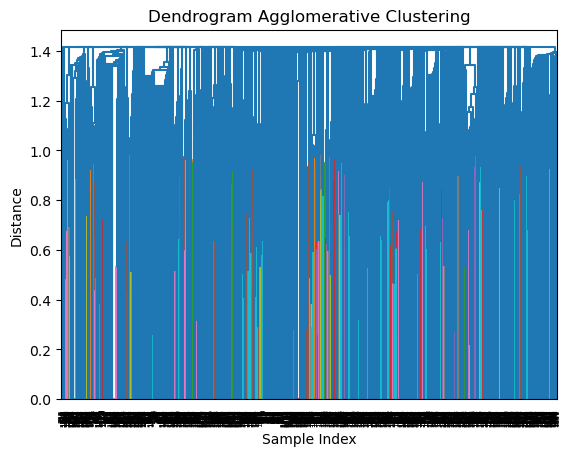

Jumlah klaster berdasarkan dendrogram: 961


In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Konversi teks menjadi vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['REF.nama_item'])

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(distance_threshold=3, n_clusters=None)
agg_clustering.fit(X.toarray())

# Visualisasi dendrogram
linked = linkage(X.toarray(), method='complete', metric='euclidean')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Dapatkan jumlah klaster berdasarkan dendrogram
max_d = 1.0  # Ambil nilai distance maksimum untuk membatasi jumlah klaster
n_clusters = sum(d > max_d for d in linked[:, 2]) + 1
print(f"Jumlah klaster berdasarkan dendrogram: {n_clusters}")

In [38]:
# filtered_df['angka'] = filtered_df['nama_item'].str.replace(r'\D', '', regex=True)

# Calculate the similarity matrix using fuzzywuzzy
similarity_matrix = pd.DataFrame(index=raw['REF.nama_item'], columns=raw['REF.nama_item'])
for i in raw['REF.nama_item']:
    for j in raw['REF.nama_item']:
        ratio = fuzz.token_set_ratio(i, j)
        similarity_matrix.loc[i, j] = ratio

# Convert similarity matrix to numeric values
similarity_matrix = similarity_matrix.astype(float)

# Scale the similarity matrix
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(similarity_matrix)

# Perform DBSCAN clustering
# Agglomerative Clustering
# Pilih jumlah klaster yang diinginkan (n_clusters)
n_clusters = 961
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(scaled_matrix)

# Assign cluster labels to the DataFrame
raw['agg_cluster_label_REF.nama_item'] = cluster_labels

# Print the clustering results
# print(raw[ 'agg_cluster_label_REF.nama_item']])

In [17]:
baut2 = baut2.sort_values(['agg_cluster2_label_nama_item2', 'agg_cluster_label_nama_item2'], ascending=[True, True])

In [20]:
# for idx,w in baut2.iterrows():
#     print(w['agg_cluster_label_nama_item2'])

In [40]:
# baut2.to_excel('baut3.xlsx',index=False)
raw.sort_values(['agg_cluster_label_REF.nama_item'],ascending=True)

kode_item                                          nama_item  \
98          610503000117            U-Bolt CLAMPp + Mur Galvanis Uk. 2 Inch   
120         610503000143           U-Bolt CLAMPp + Mur Galvanis Uk. 10 Inch   
97          610503000116        U-Bolt CLAMPp + Mur Galvanis Uk. 1 1/4 Inch   
121         610503000144           U-Bolt CLAMPp + Mur Galvanis Uk. 12 Inch   
122         610503000145           U-Bolt CLAMPp + Mur Galvanis Uk. 14 Inch   
123         610503000146            U-Bolt CLAMPp + Mur Galvanis Uk. 3 Inch   
124         610503000147            U-Bolt CLAMPp + Mur Galvanis Uk. 5 Inch   
125         610503000148            U-Bolt CLAMPp + Mur Galvanis Uk. 8 Inch   
811   SPT.P1.BB.00000014                                       BAUT M 10X55   
809   SPT.P1.BB.00000012                                       BAUT M 10X20   
703               UM26A1                    B/N STENLIS        ,f 16X2.0X70   
286              UM06826                        B/N STENLIS        ,JP.4X10   
589                 UM9A                        B/N STENLIS        ,f 10X30   
1274  GAS.GA.LL.00001954                                 BAUT M 20  X 90 MM   
1273  GAS.GA.LL.00001952                                  BAUT M 16 X 40 MM   
412                UM41D                   BAUT BAJA          ,D 30X3,5X110   
172                JD20A                   BAUT BAJA          ,D 12X1.75X70   
183                JD35B                    BAUT BAJA          ,D 22X2.5X80   
1122  SPT.P2.NS.00001385                                  BAUT L M16X100 MM   
1676  SPT.BL.MD.00000454                                  BAUT L M12X180 MM   
1675  SPT.BL.MD.00000453                                  BAUT L M12X160 MM   
1674  SPT.BL.MD.00000452                                  BAUT L M12X140 MM   
1677  SPT.BL.MD.00000455                                  BAUT L M12X200 MM   
1678  SPT.BL.MD.00000456                                  BAUT L M12X220 MM   
1680  SPT.BL.MD.00000458                                  BAUT L M12X260 MM   
1679  SPT.BL.MD.00000457                                  BAUT L M12X240 MM   
1603  SPT.P5.PD.00000316             BAUT L BAJA 12.9 M16 x 110MM HALF DRAT   
1602  SPT.P5.PD.00000315              BAUT L BAJA 12.9 M16 x 65MM HALF DRAT   
1600  SPT.P5.PD.00000313              BAUT L BAJA 12.9 M16 x 45MM FULL DRAT   
1601  SPT.P5.PD.00000314              BAUT L BAJA 12.9 M16 x 65MM HALF DRAT   
1604  SPT.P5.PD.00000317              BAUT L BAJA 12.9 M20 x 65MM HALF DRAT   
1554  SPT.P2.NS.00003453                             BAUT M 16 + MUR + RING   
1342  SPT.BL.MD.00000287                            BAUT M 5/8 + MUR + RING   
404                 UM3A                  BAUT/MUR BIASA (+) ,D 5X0.8X35/40   
405                 UM3B                  BAUT/MUR BIASA (+) ,D 5X0.8X45/50   
406                 UM3C                     BAUT/MUR BIASA (+) ,D 5X0.8X80   
380                  UM3                  BAUT/MUR BIASA (+) ,D 5X0.8X10/15   
341                UM1A1                     BAUT/MUR BIASA (+) ,D 4X0.7X30   
340                 UM1A                     BAUT/MUR BIASA (+) ,D 4X0.7X25   
343                  UM2                     BAUT/MUR BIASA (+) ,D 5X0.8X20   
583                 UM7A                                       B/N  M 8X 50   
642                  UM6                        B/N  M 8X 25                  
643                 UM6A                      B/N  M 8X 35/40                 
355                UM23A                    BAUT/MUR BAJA      ,D 14X20X190   
377               UM28A2                    BAUT/MUR BAJA      ,D 16X20X170   
376               UM28A1                    BAUT/MUR BAJA      ,D 16X20X200   
374                 UM28                    BAUT/MUR BAJA      ,D 16X20X180   
371                UM27A                    BAUT/MUR BAJA      ,D 16X20X120   
359                UM23E                    BAUT/MUR BAJA      ,D 14X20X220   
357                UM23C                BAUT/MUR BAJA      ,D 14X

In [41]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: -0.028311632281309174


## DBSCAN CLUSTER BOLT AND NUT

In [42]:
# df['nama_item_new'] = filtered_df2['nama_item'].str.replace(r'\D', '', regex=True)

# Calculate the similarity matrix using fuzzywuzzy
similarity_matrix = pd.DataFrame(index=raw['REF.nama_item'] , columns=raw['REF.nama_item'])
for i in raw['REF.nama_item']:
    for j in raw['REF.nama_item']:
        ratio = fuzz.token_set_ratio(i, j)
        similarity_matrix.loc[i, j] = ratio

# Convert similarity matrix to numeric values
similarity_matrix = similarity_matrix.astype(float)

# Scale the similarity matrix
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(similarity_matrix)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
dbscan.fit(scaled_matrix)

# Assign cluster labels to the DataFrame
raw['dbscan_cluster_label'] = dbscan.labels_

# Print the clustering results
# print(df[[ 'dbscan_cluster_label']])

In [43]:
# Calculate Silhouette Score
silhouette_avg_1 = silhouette_score(X, dbscan.labels_)
print(f'Silhouette Score: {silhouette_avg_1}')

Silhouette Score: -0.10749219637864477


In [47]:
f=raw['dbscan_cluster_label'].value_counts()
w=(f).value_counts()
print(w)

2       54
3       10
4        2
1650     1
5        1
Name: dbscan_cluster_label, dtype: int64


In [48]:
raw.to_excel('baut_v4.xlsx',index=False)

In [64]:
# # Buat DataFrame contoh dengan kolom "Text"
# data = {'Text': ["baut baja 100X2X16 MM", "sekrup 50X3X20 CM", "mur 75X1X10 DM", "ring 200X4X32 MM"]}
# dfa = pd.DataFrame(data)

# # Ekstrak "baut baja" dan "100X2X16 MM" menggunakan pola regex dan buat kolom baru
# dfa['kolom1'] = dfa[['Text']].str.extract(r'(\d+)X(\d+)X(\d+)')

# # # Hapus kolom "Text" jika tidak diperlukan lagi
# # dfa = dfa.drop(columns=['Text'])


   kolom1       kolom2
0    baut  100X2X16 MM
1  sekrup   50X3X20 CM
2     mur   75X1X10 DM
3    ring          NaN


In [5]:
import pandas as pd
import re

# Buat DataFrame contoh dengan kolom "Text"
data = {'Text': ["baut M 100X2X16 MM", "sekrup 50X3X20 CM", "mur 75X1X10 DM", "ring 200X4 MM","lala 453"]}
dfa = pd.DataFrame(data)

# Ekstrak "baut baja" dan "100X2X16 MM" menggunakan pola regex dan buat kolom baru
# dfa['kolom1'] = dfa['Text'].str.extract(r'^(.*?)\s(\b\w+?\s*\b)')[0]
# dfa['kolom1'] = dfa['Text'].str.extract(r'^(.*?)(?=\s\w+\s|$)')[0]
dfa['kolom1'] = dfa['Text'].str.extract(r'^(.*?)\s([^ ]+)$')[0]
dfa['kolom2'] = dfa['Text'].str.extract(r'^(.*?)\s(\d+X\d+X\d+\s\w+)$')[1]

# Hapus kolom "Text" jika tidak diperlukan lagi
dfa = dfa.drop(columns=['Text'])

print(dfa)
# # Menggunakan regex untuk menemukan semua kata dari [a-z] sampai ditemukan angka
# words = re.findall(, input_str, flags=re.IGNORECASE)


            kolom1       kolom2
0  baut M 100X2X16  100X2X16 MM
1   sekrup 50X3X20   50X3X20 CM
2      mur 75X1X10   75X1X10 DM
3       ring 200X4          NaN
4             lala          NaN


## POLA INCH

In [11]:
import re

def inch_to_mm(input_str):
    conversion_factor = 25.4
    
    # Fungsi untuk mengkonversi angka menjadi milimeter
    def convert_to_mm(match):
        value_in_inch = float(match.group(1))
        value_in_mm = value_in_inch * conversion_factor
        return f"{value_in_mm:.2f} MM"
    
    # Menggunakan regex untuk menemukan angka dalam string dengan satuan "INCH"
    pattern = r'(\d+(\.\d+)?)\s*INCH'
    # pattern = r'(\d+(\.\d+)?)|(\d+\/\d+)s*INCH'
    # pattern = r'(\d+(\.\d+)?)/(\d+)?\s*INCH'
    output_str = re.sub(pattern, convert_to_mm, input_str, flags=re.IGNORECASE)
    
    return output_str

# Contoh penggunaan
#TIDAK BISA 1/2, 3/4 REPLACE DULU MENGGUNAKAN KOMA
#ANGKA HARUS MENGGUNAKAN KOMA CONTOH 0.5, 1.2
input_string = "WATER MUR GALVANIS 0.5 INCH SNI"
hasil_konversi = inch_to_mm(input_string)
print(hasil_konversi)  # Output: "38.1 MM"


WATER MUR GALVANIS 12.70 MM SNI


In [117]:
# import re

# def inch_to_mm(input_str):
#     conversion_factor = 25.4
    
#     # Fungsi untuk mengkonversi angka menjadi milimeter
#     def convert_to_mm(match):
#         value_in_inch = float(match.group(1))
#         value_in_mm = value_in_inch * conversion_factor
#         return f"{value_in_mm:.1f} MM"
    
#     # Menggunakan regex untuk menemukan angka dalam string dengan satuan "INCH"
#     # pattern = r'(\d+(\.\d+)?)\s*INCH'
#     # pattern = r'(\d+(\.\d+)?)/(\d+)?\s*INCH'
#     pattern = r'(\d+(\.\d+)?)|(\d+\/\d+)s*INCH'
#     # pattern = r'(\d+(\.\d+)?(/(2|3))?)\s*INCH'
#     output_str = re.sub(pattern, convert_to_mm, input_str, flags=re.IGNORECASE)
    
#     return output_str

# # Contoh penggunaan
# input_string = "WATER MUR GALVANIS 1/2 INCH SNI"
# hasil_konversi = inch_to_mm(input_string)
# print(hasil_konversi)  # Output: "38.1 MM"


In [55]:
# import re

# def inch_to_mm(input_str):
#     conversion_factor = 25.4
    
#     # Fungsi untuk mengkonversi angka menjadi milimeter
#     def convert_to_mm(match):
#         value_in_inch = float(match.group(1))
#         value_in_mm = value_in_inch * conversion_factor
#         return f"{value_in_mm:.1f} MM"
    
#     # Menggunakan regex untuk menemukan angka dalam string dengan satuan "INCH" atau dalam format pecahan (1/2 atau 1/3)
#     pattern = r'(\d+(\.\d+)?|\d+\/\d+)\s*INCH'
#     output_str = re.sub(pattern, convert_to_mm, input_str, flags=re.IGNORECASE)
    
#     return output_str

# # Contoh penggunaan
# input_string = "WATER MUR GALVANIS 1/2 INCH SNI"
# hasil_konversi = inch_to_mm(input_string)
# print(hasil_konversi)  # Output: "12.7 MM"


ValueError: could not convert string to float: '1/2'

In [56]:
# import re
# from fractions import Fraction

# def inch_to_mm(input_str):
#     conversion_factor = 25.4
    
#     # Function to convert fractions to float
#     def fraction_to_float(fraction_str):
#         try:
#             return float(Fraction(fraction_str))
#         except ValueError:
#             return None

#     # Function to convert numbers to millimeters
#     def convert_to_mm(match):
#         number_str = match.group()
#         if '/' in number_str:
#             value_in_inch = fraction_to_float(number_str)
#         else:
#             value_in_inch = float(number_str)
        
#         if value_in_inch is not None:
#             value_in_mm = value_in_inch * conversion_factor
#             return f"{value_in_mm:.1f} MM"
#         else:
#             return number_str + " (Invalid Format)"

#     # Using regex to find numbers with or without decimals, or in fraction format (1/2 or 1/3) with "INCH" unit
#     pattern = r'(\d+(\.\d+)?|\d+\/\d+)\s*INCH'
#     output_str = re.sub(pattern, convert_to_mm, input_str, flags=re.IGNORECASE)
    
#     return output_str

# # Example usage
# input_string = "WATER MUR GALVANIS 1.5 INCH, 1/2 INCH, and 2/3 INCH"
# result = inch_to_mm(input_string)
# print(result)  # Output: "38.1 MM, 12.7 MM, and 17.0 MM"


ValueError: could not convert string to float: '1.5 INCH'

## TARGET WORD

In [36]:
raw = pd.read_excel('baut120923_v20.xlsx')

In [65]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   kode_item                        577 non-null    object
 1   nama_item                        577 non-null    object
 2   sbu                              577 non-null    object
 3   ref_id                           577 non-null    object
 4   REF.nama_item                    577 non-null    object
 5   New Item                         577 non-null    object
 6   Unnamed: 6                       23 non-null     object
 7   agg_cluster_label_REF.nama_item  577 non-null    int64 
 8   dbscan_cluster_label             577 non-null    object
 9   jaro_wink_dbscan_cluster_label   577 non-null    int64 
 10  target_word_cluster3             577 non-null    object
dtypes: int64(2), object(9)
memory usage: 49.7+ KB


In [18]:
# Define target word per cluster
target_word = ["+MUR"]
# Define function to determine example "kata" is inside target_word or blank string
def determine_target_word(text, target_word = target_word, threshold = 90) -> str:
  """
  Tips to reduce "blank" result:
   1. set lower threshold
   2. enrich target-word
  """
  result = ""
for target in target_word:
    score = fuzz.token_set_ratio(text, target)
    if score >= threshold:
        result = target
        break
        
return result

NameError: name 'threshold' is not defined

In [63]:
from fuzzywuzzy import fuzz

# Define target word per cluster
target_word = ["+MUR"]

# Define function to determine if "text" is inside target_word or a blank string
def determine_target_word(text, target_word=target_word, threshold=90) -> str:
    """
    Tips to reduce "blank" result:
    1. set lower threshold
    2. enrich target-word
    """
    result = ""
    for target in target_word:
        score = fuzz.token_set_ratio(text, target)
        if score >= threshold:
            result = target
            break
    return result

# Example usage:
# NOTE: .progress_apply() only approriate while tqdm.pandas() is already running
raw['target_word_cluster3'] = raw['New Item'].apply(determine_target_word)


In [64]:
filter_raw_mur = raw[raw['target_word_cluster3'] == '+MUR']

In [31]:
# Define a function to move "+MUR" after "BAUT" in a string
def move_mur(text):
    pattern = r'(BAUT)(\s+)(\w+)(\+MUR)'
    new_text = re.sub(pattern, r'\1\2\4\3', text)
    return new_text

# Apply the function to each element in the 'New Item' column
raw['New Item'] = raw['New Item'].apply(lambda x: move_mur(x))

In [40]:
filter_raw_mur['New Item'] = filter_raw_mur['New Item'].str.replace('BAUT L', 'BAUT MUR L')

C:\Users\Corporate\AppData\Local\Temp\ipykernel_400\3121203869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_raw_mur['New Item'] = filter_raw_mur['New Item'].str.replace('BAUT L', 'BAUT MUR L')


In [44]:
filter_raw_mur

kode_item                             nama_item  sbu   ref_id  \
11   SPT.P2.CM.00000641             BAUT L M 10 X 30 MM + MUR  IPG  IT-2925   
12   SPT.P2.CM.00000670                BAUT L M 10 X 40 + MUR  IPG  IT-3286   
38   GAS.GA.LL.00003434                  BAUT L M 10X40 + MUR  IPG  IT-3018   
39   GAS.GA.LL.00002874                  BAUT L M 10X60 + MUR  IPG  IT-2295   
179  SMI.BP.00.00000458                  BAUT L M 5x100 + MUR  IPG  IT-2601   
184  SPT.P5.MT.00000124                   BAUT L M 5X30 + MUR  IPG  IT-2001   
223  SPT.P5.MT.00000123                   BAUT L M 6X30 + MUR  IPG  IT-2422   
229  SPT.P5.MT.00000855           BAUT L 8 X 110 + MUR + RING  IPG  IT-2698   
267  GAS.GA.LL.00003028                   BAUT L M 8X30 + MUR  IPG  IT-3504   
291  SPT.P2.NS.00001289                BAUT L M10 X 75 MM+MUR  IPG  IT-2493   
294  SPT.P2.CM.00000734                     BAUT L M10X40+MUR  IPG  IT-1876   
295  SPT.P2.CM.00000674                 BAUT L M10X40MM + MUR  IPG  IT-1839   
298  SPT.P2.NS.00002966                   BAUT L M10X65MM+MUR  IPG  IT-1939   
299  SPT.P2.NS.00003621                     BAUT L M10X70+MUR  IPG  IT-2554   
300  SPT.P2.NS.00004189                  BAUT L M10X80 MM+MUR  IPG  IT-3068   
301  SPT.P2.NS.00003622                     BAUT L M10X90+MUR  IPG  IT-2442   
305  SPT.P2.NS.00001334                 BAUT L M12 X 35 + MUR  IPG  IT-3343   
318  SPT.P2.NS.00000074                   BAUT L M12X40MM+MUR  IPG  IT-2955   
321  SPT.P2.NS.00002967                   BAUT L M12X65MM+MUR  IPG  IT-2461   
327  SPT.BL.MD.00000460                    BAUT L M16X200+MUR  IPG  IT-2699   
329  SPT.BL.MD.00000459                     BAUT L M16X40+MUR  IPG  IT-2450   
330  SPT.P2.NS.00002963                BAUT L M16X50 MM + MUR  IPG  IT-2650   
331  SPT.P2.NS.00001125                BAUT L M16X60 MM + MUR  IPG  IT-2959   
332  SPT.P2.NS.00002278                     BAUT L M16x75+MUR  IPG  IT-2866   
333  SPT.BL.LB.00000031            BAUT L M19X50 + MUR + RING  IPG  IT-3235   
338  SPT.P2.NS.00003262                  BAUT L M20X40 MM+MUR  IPG  IT-3197   
342  SPT.P2.NS.00000648                   BAUT L M22X75 + MUR  IPG  IT-3400   
346  SPT.P2.NS.00003261                   BAUT L M2X40 MM+MUR  IPG  IT-2020   
352  SPT.P2.NS.00001010                  BAUT L M5 X 30 + MUR  IPG  IT-2105   
353  SPT.P2.NS.00003682                BAUT L M5 X 50MM + MUR  IPG  IT-2929   
354  SPT.P2.CM.00000732                    BAUT L M5X60MM+MUR  IPG  IT-2672   
355  SPT.P2.NS.00001101               BAUT L M6 X 10 mm + MUR  IPG  IT-3245   
357  SPT.P2.NS.00000191                  BAUT L M6 X 20 + MUR  IPG  IT-2305   
359  SPT.P2.NS.00001408                  BAUT L M6 X 25 + MUR  IPG  IT-3254   
361  SPT.P2.NS.00003683                  BAUT L M6 X 50 + MUR  IPG  IT-2182   
363  SPT.P2.NS.00001011                    BAUT L M6X30 + MUR  IPG  IT-1880   
364  SPT.P2.NS.00001107                      BAUT L M6X40+MUR  IPG  IT-2046   
365  SPT.P2.NS.00002968                    BAUT L M6X65MM+MUR  IPG  IT-3169   
371  SPT.P2.CM.00000718                BAUT L M8 X 30MM + MUR  IPG  IT-1818   
378  SMI.BP.00.00000684                    BAUT L M8X16 + MUR  IPG  IT-3414   
379  SPT.P2.NS.00001012                    BAUT L M8X40 + MUR  IPG  IT-2793   
381  SPT.P2.NS.00002965                    BAUT L M8X65MM+MUR  IPG  IT-2604   
384  SPT.P2.NS.00003469                 BAUT L12 X 100 MM+MUR  IPG  IT-3231   
390  SPT.P2.NS.00003263                     BAUT L3/4"X2"+MUR  IPG  IT-3203   
391  SPT.P5.MT.00000688             BAUT L4 X 30 + RING + MUR  IPG  IT-1917   
399  SPT.P1.BB.00000072                    BAUT L6X40mm + MUR  IPG  IT-3362   
424  SPT.P1.BB.00000127                 MUR + BAUT L M10X35MM  IPG  IT-2437   
463  SPT.P5.MT.00000757  BAUT L BAJA + MUR + RING M20 X 200mm  IPG  IT-1959   
510  SPT.BL.LB.00000242                 BAUT L M6 x 100 + MUR  IPG  IT-2453   
534             UM00404           BAUT L PAYUNG M8 X 30 + MUR  I

In [49]:
# Define a function to remove "+MUR" using fuzzy matching
def remove_mur(text, threshold=80):
    words = text.split()  # Split the text into words
    cleaned_words = []

    for word in words:
        # Calculate the fuzzy similarity between the word and "+MUR"
        similarity = fuzz.token_sort_ratio(word, "+MUR")

        # If the similarity is below the threshold, keep the word
        if similarity < threshold:
            cleaned_words.append(word)

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text


In [61]:
filter_raw_mur['New Item'] = filter_raw_mur['New Item'].str.replace('MUR','')

C:\Users\Corporate\AppData\Local\Temp\ipykernel_400\3450415834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_raw_mur['New Item'] = filter_raw_mur['New Item'].str.replace('MUR','')


In [66]:
filter_raw_mur['New Item'] = filter_raw_mur['New Item'].str.replace('MUR','')
filter_raw_mur['New Item'] = filter_raw_mur['New Item'].str.replace('+','')

C:\Users\Corporate\AppData\Local\Temp\ipykernel_400\1865789938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_raw_mur['New Item'] = filter_raw_mur['New Item'].str.replace('MUR','')
C:\Users\Corporate\AppData\Local\Temp\ipykernel_400\1865789938.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filter_raw_mur['New Item'] = filter_raw_mur['New Item'].str.replace('+','')
C:\Users\Corporate\AppData\Local\Temp\ipykernel_400\1865789938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [67]:
filter_raw_mur

kode_item                             nama_item  sbu   ref_id  \
11   SPT.P2.CM.00000641             BAUT L M 10 X 30 MM + MUR  IPG  IT-2925   
12   SPT.P2.CM.00000670                BAUT L M 10 X 40 + MUR  IPG  IT-3286   
38   GAS.GA.LL.00003434                  BAUT L M 10X40 + MUR  IPG  IT-3018   
39   GAS.GA.LL.00002874                  BAUT L M 10X60 + MUR  IPG  IT-2295   
179  SMI.BP.00.00000458                  BAUT L M 5x100 + MUR  IPG  IT-2601   
184  SPT.P5.MT.00000124                   BAUT L M 5X30 + MUR  IPG  IT-2001   
223  SPT.P5.MT.00000123                   BAUT L M 6X30 + MUR  IPG  IT-2422   
229  SPT.P5.MT.00000855           BAUT L 8 X 110 + MUR + RING  IPG  IT-2698   
267  GAS.GA.LL.00003028                   BAUT L M 8X30 + MUR  IPG  IT-3504   
291  SPT.P2.NS.00001289                BAUT L M10 X 75 MM+MUR  IPG  IT-2493   
294  SPT.P2.CM.00000734                     BAUT L M10X40+MUR  IPG  IT-1876   
295  SPT.P2.CM.00000674                 BAUT L M10X40MM + MUR  IPG  IT-1839   
298  SPT.P2.NS.00002966                   BAUT L M10X65MM+MUR  IPG  IT-1939   
299  SPT.P2.NS.00003621                     BAUT L M10X70+MUR  IPG  IT-2554   
300  SPT.P2.NS.00004189                  BAUT L M10X80 MM+MUR  IPG  IT-3068   
301  SPT.P2.NS.00003622                     BAUT L M10X90+MUR  IPG  IT-2442   
305  SPT.P2.NS.00001334                 BAUT L M12 X 35 + MUR  IPG  IT-3343   
318  SPT.P2.NS.00000074                   BAUT L M12X40MM+MUR  IPG  IT-2955   
321  SPT.P2.NS.00002967                   BAUT L M12X65MM+MUR  IPG  IT-2461   
327  SPT.BL.MD.00000460                    BAUT L M16X200+MUR  IPG  IT-2699   
329  SPT.BL.MD.00000459                     BAUT L M16X40+MUR  IPG  IT-2450   
330  SPT.P2.NS.00002963                BAUT L M16X50 MM + MUR  IPG  IT-2650   
331  SPT.P2.NS.00001125                BAUT L M16X60 MM + MUR  IPG  IT-2959   
332  SPT.P2.NS.00002278                     BAUT L M16x75+MUR  IPG  IT-2866   
333  SPT.BL.LB.00000031            BAUT L M19X50 + MUR + RING  IPG  IT-3235   
338  SPT.P2.NS.00003262                  BAUT L M20X40 MM+MUR  IPG  IT-3197   
342  SPT.P2.NS.00000648                   BAUT L M22X75 + MUR  IPG  IT-3400   
346  SPT.P2.NS.00003261                   BAUT L M2X40 MM+MUR  IPG  IT-2020   
352  SPT.P2.NS.00001010                  BAUT L M5 X 30 + MUR  IPG  IT-2105   
353  SPT.P2.NS.00003682                BAUT L M5 X 50MM + MUR  IPG  IT-2929   
354  SPT.P2.CM.00000732                    BAUT L M5X60MM+MUR  IPG  IT-2672   
355  SPT.P2.NS.00001101               BAUT L M6 X 10 mm + MUR  IPG  IT-3245   
357  SPT.P2.NS.00000191                  BAUT L M6 X 20 + MUR  IPG  IT-2305   
359  SPT.P2.NS.00001408                  BAUT L M6 X 25 + MUR  IPG  IT-3254   
361  SPT.P2.NS.00003683                  BAUT L M6 X 50 + MUR  IPG  IT-2182   
363  SPT.P2.NS.00001011                    BAUT L M6X30 + MUR  IPG  IT-1880   
364  SPT.P2.NS.00001107                      BAUT L M6X40+MUR  IPG  IT-2046   
365  SPT.P2.NS.00002968                    BAUT L M6X65MM+MUR  IPG  IT-3169   
371  SPT.P2.CM.00000718                BAUT L M8 X 30MM + MUR  IPG  IT-1818   
378  SMI.BP.00.00000684                    BAUT L M8X16 + MUR  IPG  IT-3414   
379  SPT.P2.NS.00001012                    BAUT L M8X40 + MUR  IPG  IT-2793   
381  SPT.P2.NS.00002965                    BAUT L M8X65MM+MUR  IPG  IT-2604   
384  SPT.P2.NS.00003469                 BAUT L12 X 100 MM+MUR  IPG  IT-3231   
390  SPT.P2.NS.00003263                     BAUT L3/4"X2"+MUR  IPG  IT-3203   
391  SPT.P5.MT.00000688             BAUT L4 X 30 + RING + MUR  IPG  IT-1917   
399  SPT.P1.BB.00000072                    BAUT L6X40mm + MUR  IPG  IT-3362   
424  SPT.P1.BB.00000127                 MUR + BAUT L M10X35MM  IPG  IT-2437   
463  SPT.P5.MT.00000757  BAUT L BAJA + MUR + RING M20 X 200mm  IPG  IT-1959   
510  SPT.BL.LB.00000242                 BAUT L M6 x 100 + MUR  IPG  IT-2453   
534             UM00404           BAUT L PAYUNG M8 X 30 + MUR  I

In [ ]:
non_blank_df = raw[raw['target_word_cluster2'] != ""]
non_blank_df